##### 1. Business understanding
• Give your view of the business problem following the CRISP-DM list of outputs when adequate.

#### 2. Data Understanding
• Looking at the raw data, describe variables according to their types: interval-scaled, binary, nominal, ordinal, ratio-scaled. Be aware that there are specific methods suitable to each type of variable.  
• Perform a preliminary analysis (summaries, spread measures, histograms, boxplots, density). These are interesting to be applied to the raw data to “uncover’’ inconsistencies, outliers, duplicates etc.  
• Perform bivariate analysis (correlations, regression)  
• Provide any insights about the data and the problem that you may have found.

#### 3. Data Preparation
• List of main changes that can need to be performed to the raw data, including feature selection.  
• Describe the potentially useful ones and their results in terms of data.

#### 4. Modeling 
(consider the balanced and the non-balanced versions of the dataset as 2 separate problems)
First work with the balanced data and then with the non-balanced data. Try each of the methods
below, select hyper parameters using default values and empirical analysis. Separate a test set and use cross-validation on the rest of the examples. Visualize models when possible, visualize results, produce aggregating tables with good insightful summaries of the results, and whatever other tools you may find useful.  
• Nearest neighbor  
• Bayesian Classifier  
• Decision Trees  
• Tree ensembles  
• Support Vector Machines  
• Neural Network Classifier  
• Comparison  
#### 5. Evaluation and Main Conclusions
• What is the best model and the recommended data science procedure for each business problem?  
• What do you think that the business can gain from your data science effort?  
• What are the lessons learnt?  
• What is your summary of the achieved results?  

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
data=pd.read_excel("food_product_acceptance_dataset.xlsx")
print(data.info())

#print(data.head())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_id                   2000 non-null   object 
 1   name                         2000 non-null   object 
 2   category                     2000 non-null   object 
 3   subcategory                  2000 non-null   object 
 4   description                  2000 non-null   object 
 5   country_origin               2000 non-null   object 
 6   calories                     2000 non-null   int64  
 7   fat_g                        2000 non-null   float64
 8   sugar_g                      2000 non-null   float64
 9   protein_g                    1929 non-null   float64
 10  fiber_g                      1937 non-null   float64
 11  sodium_mg                    2000 non-null   int64  
 12  organic                      2000 non-null   bool   
 13  gluten_free       

,product_id,name,category,subcategory,description,country_origin,calories,fat_g,sugar_g,protein_g,...,brand_trust,packaging_appeal,eco_score,shelf_life_days,distribution_channels_count,review_count_prelaunch,allergy_warnings_count,marketing_spend_k,overall_appreciation,success
0,FPE0IF,Lime Coffee rtd,Beverage,Coffee RTD,Light beverage with lime notes based on rice c...,Spain,60,2.2,10.9,8.0,...,5.9,4.6,76,54,2,7,1,75.2,8.472195,0
1,FPSAHX,Garlic Dressing,Condiment,Dressing,Velvety condiment with garlic notes based on l...,USA,115,6.4,11.6,1.3,...,7.5,6.6,53,59,6,17,0,125.0,9.795238,1
2,FPZMF8,Honey Savory,Snacks,Savory,Chewy snacks with honey notes based on corn,Japan,157,9.1,13.4,6.0,...,6.6,5.2,62,64,3,10,1,65.1,8.922595,1
3,FPJBQE,Lime Herbal tea,Beverage,Herbal Tea,Dense beverage with lime notes based on potato,Japan,44,2.1,8.6,4.7,...,7.0,5.9,86,47,4,4,0,120.3,8.931065,1
4,FPZBIK,Beetroot Veg mix,Frozen,Veg Mix,Chewy frozen with beetroot notes based on rice,Japan,203,8.7,14.1,9.1,...,5.0,8.1,93,64,5,4,0,84.6,6.078362,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,FPHQW2,Sesame Dessert,Dairy,Dessert,Creamy dairy with sesame notes based on quinoa...,Portugal,186,5.3,13.5,13.5,...,0.7,4.4,63,24,4,14,1,108.3,5.845786,1
1996,FPRIO7,Thyme Ice cream,Frozen,Ice Cream,Smooth frozen with thyme notes based on wheat,South Korea,236,5.7,14.1,6.1,...,6.9,6.6,92,60,4,20,3,115.0,5.927328,1
1997,FPN6FA,Bbq Pasta,Supplements,Pasta,Chewy ready meal with bbq notes based on quinoa,USA,371,12.6,6.2,19.3,...,6.0,10.0,47,56,3,3,3,105.1,5.924491,1
1998,FPUF0T,Maple Yogurt,RTD Meal,Yogurt,Creamy dairy with maple notes based on wheat c...,Germany,136,2.9,10.7,13.2,...,9.0,3.7,77,21,4,15,2,113.2,9.755649,1


### Business problem 
We want to create a new product that would be successful in the market taking into consideration its type, price, characteristics. In detail:
1. Drastically reduce the rate of expensive product market failures by implementing a data-driven system capable of predicting a product's eventual success or failure before committing to large-scale production and distribution.
2. Reduce reliance on costly, time-consuming sensory panel testing by validating a predictive model that can reliably estimate a product’s Overall Appreciation Score based on easily measurable and controllable features (like ingredients, price, and basic marketing metrics).
3. Identify and quantify the causal link between product features (sensory scores, nutritional data, price) and market success, creating a set of evidence-based guidelines for the Research, Development and Marketing teams.

There are 41 variables: <br>

- **Nominal variables**:
Variables used for identification or grouping. They have distinct categories but no inherent order. They describe a product.
  1. product_id
  2. name
  3. category (there are 9 categories so it might be useful to try it with One-Hot encoding)
  4. subcategory
  5. description
  6. country_origin

- **Binary variables (0,1)**: 
  Indicate popular product features
  1. organic
  2. gluten_free
  3. contains_nuts
  4. contains_meat
  5. contains_dairy
  6. seasonal
  7. success (target)

- **Ordinal (0-5)**: Variables with a clear, ranked order, but the difference between levels doesn't have to be uniform or measurable.
  1. spicy_level (but this is categorical so it might be useful to try it with One-Hot encoding)

- **Interval_scaled numeric(0-10)**: The difference between scores is consistent, ratios are not meaningful. Mostly show subjective experience from tasting a product.
  1. color_intensity
  2. aroma_intensity
  3. sweetness
  4. saltiness
  5. bitterness
  6. umami
  7. sourness
  8. texture_crispness
  9. texture_softness
  10. aftertaste_length
  11. familiarity_score
  12. novelty_score
  13. brand_trust
  14. packaging_appeal
  15. overall_appreciation (Target)


- **Ratio-scaled numerical variables**: The nutritional values and some distribution charasteristics:
  1. calories
  2. fat_g
  3. sugar_g
  4. protein_g
  5. fiber_g
  6. sodium_mg
  7. price
  8. eco_score
  9. shelf_life_days
  10. distribution_channels_count (but this is categorical so it might be useful to try it with One-Hot encoding)
  11. review_count_prelaunch
  12. allergy_warnings_count (but this is categorical so it might be useful to try it with One-Hot encoding)
  13. marketing_spend_k


column	type	description <br>
product_id	string	Unique product code.<br>
name	string	Marketing name; flavor + category/subcategory.<br>
category	categorical	Top-level product category.<br>
subcategory	categorical	Subcategory within category.<br>
description	string	Short product descriptor.<br>
country_origin	categorical	Country of origin.<br>
calories	numeric	Per serving calories (kcal).<br>
fat_g	numeric	Fat per serving (g).<br>
sugar_g	numeric	Sugar per serving (g).<br>
protein_g	numeric	Protein per serving (g).<br>
fiber_g	numeric	Fiber per serving (g).<br>
sodium_mg	numeric	Sodium per serving (mg).<br>
organic	binary	Organic certification (True/False).<br>
gluten_free	binary	Gluten-free claim (True/False).<br>
contains_nuts	binary	Contains nuts (True/False).<br>
contains_meat	binary	Contains meat (True/False).<br>
contains_dairy	binary	Contains dairy (True/False).<br>
seasonal	binary	Seasonal/limited edition (True/False).<br>
spicy_level	ordinal 0-5	Subjective spiciness from panel.<br>
color_intensity	numeric 0-10	Visual color intensity rating.<br>
aroma_intensity	numeric 0-10	Aroma intensity rating.<br>
sweetness	numeric 0-10	Sweetness rating.<br>
saltiness	numeric 0-10	Saltiness rating.<br>
bitterness	numeric 0-10	Bitterness rating.<br>
umami	numeric 0-10	Umami rating.<br>
sourness	numeric 0-10	Sourness rating.<br>
texture_crispness	numeric 0-10	Crispness rating.<br>
texture_softness	numeric 0-10	Softness rating.<br>
aftertaste_length	numeric 0-10	Aftertaste length rating.<br>
price	numeric	Suggested retail price (Euro).<br>
familiarity_score	numeric 0-10	Consumer familiarity.<br>
novelty_score	numeric 0-10	Perceived novelty.<br>
brand_trust	numeric 0-10	Trust in brand.<br>
packaging_appeal	numeric 0-10	Packaging visual appeal.<br>
eco_score	numeric 0-100	Environmental friendliness score.<br>
shelf_life_days	integer	Shelf life in days.<br>
distribution_channels_count	integer	Count of planned channels.<br>
review_count_prelaunch	integer	Pre-launch review mentions.<br>
allergy_warnings_count	integer	Count of allergy warnings present.<br>
marketing_spend_k	numeric	Marketing spend allocated (€ thousands).<br>
overall_appreciation	target (0-10)	Overall appreciation from taster<br>
success	target (0/1)	Expected market success

## Analysis of nominal variables

Variable: category
Total Unique Categories: 9
Missing Rows: 0
Top categories (9 out of 9):
| category    |   Count |   Proportion (%) |
|:------------|--------:|-----------------:|
| Snacks      |     460 |            23    |
| Beverage    |     391 |            19.55 |
| Ready Meal  |     381 |            19.05 |
| Dairy       |     307 |            15.35 |
| Bakery      |     197 |             9.85 |
| Frozen      |     144 |             7.2  |
| Condiment   |     100 |             5    |
| RTD Meal    |      12 |             0.6  |
| Supplements |       8 |             0.4  |


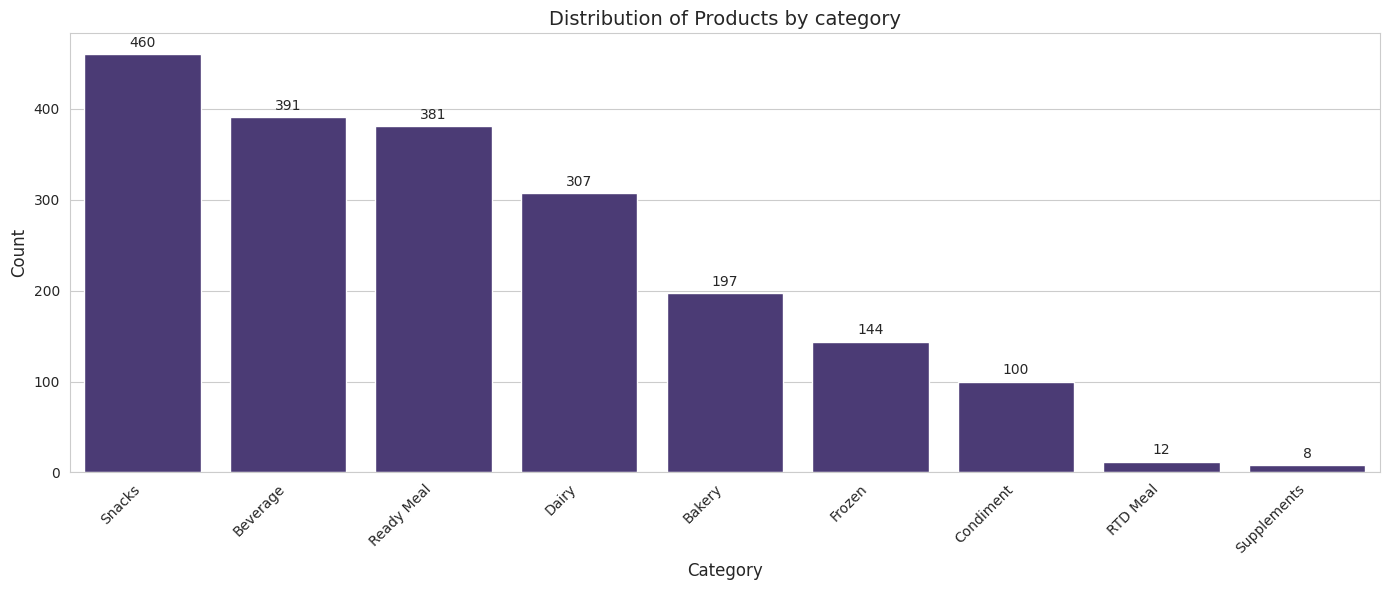

Variable: subcategory
Total Unique Categories: 39
Missing Rows: 0
Top categories (10 out of 39):
| subcategory   |   Count |   Proportion (%) |
|:--------------|--------:|-----------------:|
| Soup          |      97 |             4.85 |
| Healthy       |      85 |             4.25 |
| Baked         |      83 |             4.15 |
| Curry         |      80 |             4    |
| Pasta         |      77 |             3.85 |
| Vegetable     |      76 |             3.8  |
| Sparkling     |      76 |             3.8  |
| Experimental  |      75 |             3.75 |
| Sweet         |      71 |             3.55 |
| Savory        |      70 |             3.5  |


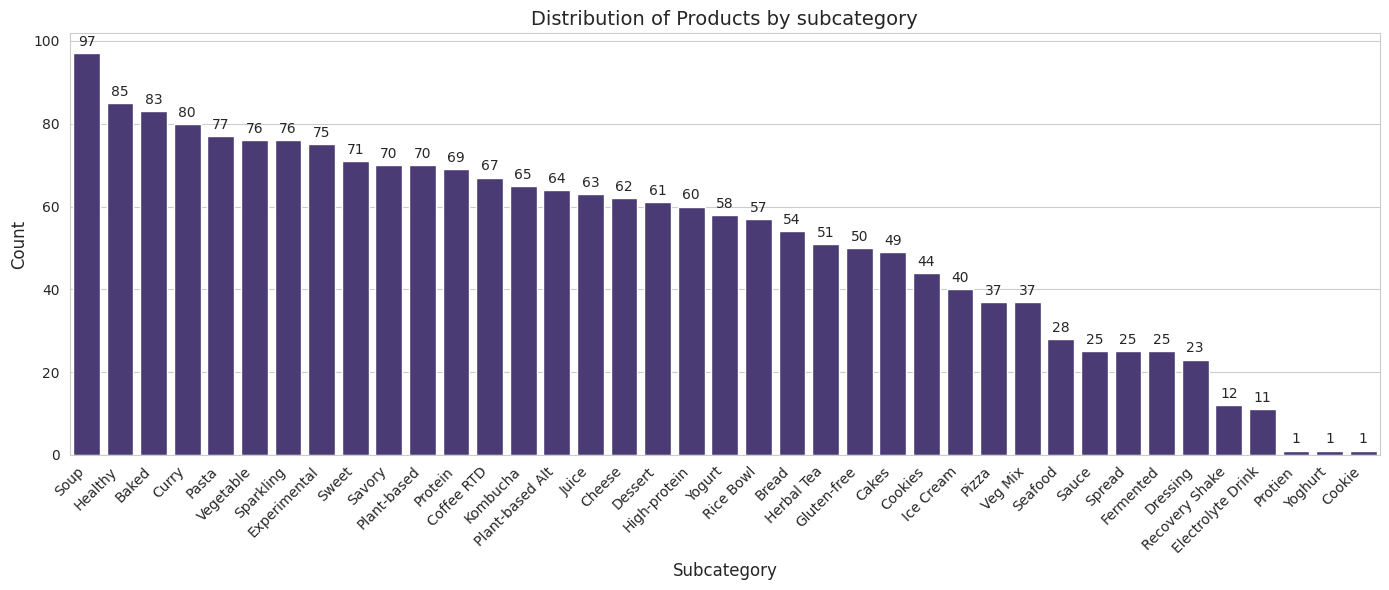

Variable: country_origin
Total Unique Categories: 20
Missing Rows: 0
Top categories (10 out of 20):
| country_origin   |   Count |   Proportion (%) |
|:-----------------|--------:|-----------------:|
| Australia        |     122 |             6.1  |
| South Korea      |     117 |             5.85 |
| Sweden           |     114 |             5.7  |
| UK               |     111 |             5.55 |
| Spain            |     108 |             5.4  |
| Italy            |     107 |             5.35 |
| Portugal         |     107 |             5.35 |
| New Zealand      |     105 |             5.25 |
| Canada           |     105 |             5.25 |
| Netherlands      |     105 |             5.25 |


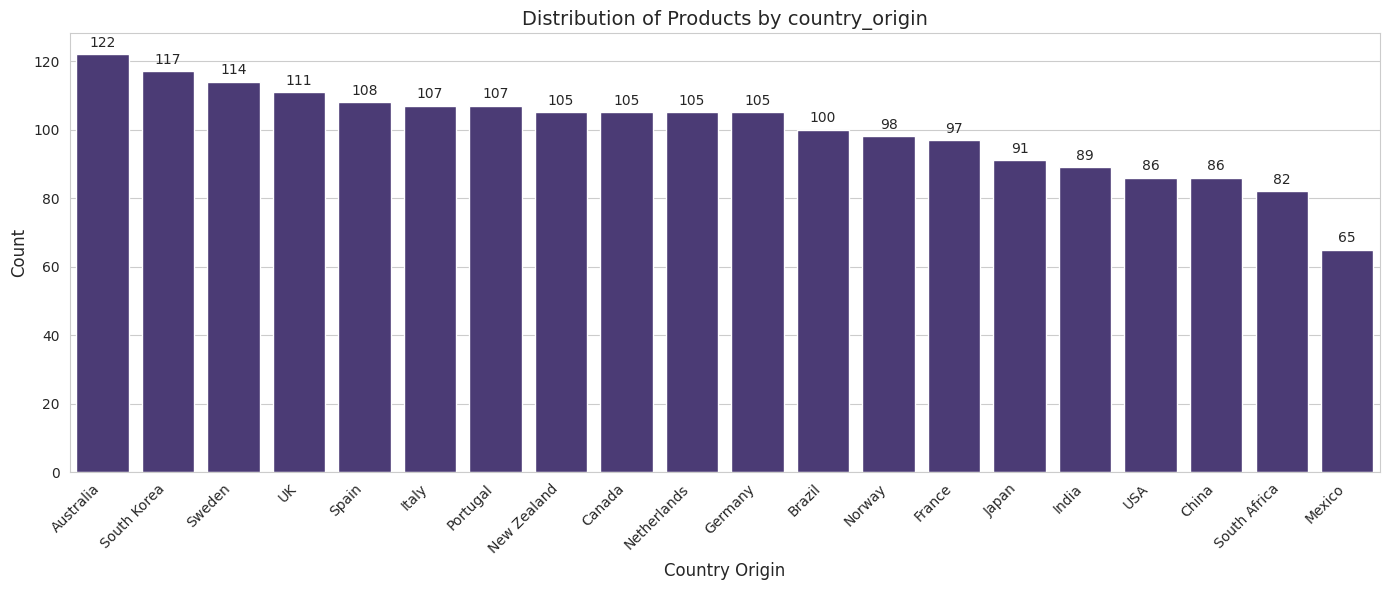

Text Variable Check
Variable 'product_id': Total Unique Values = 1999
Variable 'name': Total Unique Values = 925
Variable 'description': Total Unique Values = 1955


In [24]:
NOMINAL_COLS = ['category', 'subcategory', 'country_origin']
# Exclude text columns for printing unique counts
EXCLUDE_TEXT_COLS = ['product_id', 'name', 'description']
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 100

top_n = 10

for col in NOMINAL_COLS:
    # 1. Calculate and Print Descriptive Statistics
    counts = data[col].value_counts()
    proportions = data[col].value_counts(normalize=True) * 100
    # Calculate the number of null rows
    null_count = data[col].isnull().sum()
    summary_df = pd.DataFrame({
        'Count': counts,
        'Proportion (%)': proportions.round(2)
    })

    num_unique = data[col].nunique()
    print(f"Variable: {col}")
    print(f"Total Unique Categories: {num_unique}")
    # Display the null count
    print(f"Missing Rows: {null_count}")
    print(f"Top categories ({min(num_unique, top_n)} out of {num_unique}):")
    print(summary_df.head(top_n).to_markdown())

    # 2. Generate Bar Plot
    plt.figure()
    ax = sns.barplot(x=counts.index, y=counts.values, order=counts.index, color=sns.color_palette("viridis")[0])
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    plt.title(f'Distribution of Products by {col}', fontsize=14)
    plt.xlabel(col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# 3. Print analysis for excluded text columns
print("Text Variable Check")
for col in EXCLUDE_TEXT_COLS:
    if col in data.columns:
        print(f"Variable '{col}': Total Unique Values = {data[col].nunique()}")
        null_count = data[col].isnull().sum()
        if     null_count >0:
            print(f"Missing Rows: {null_count}")



There are just 9 categories so it may be useful to encode them. The number of subcategories is bigger and there are some of them containing only one otem so it may not be useful to use them in the model. The country of origin has 20 values and all of them have more than 60 observations so it may be worth considering it in a model.
There are no missing values.

## Binary variables

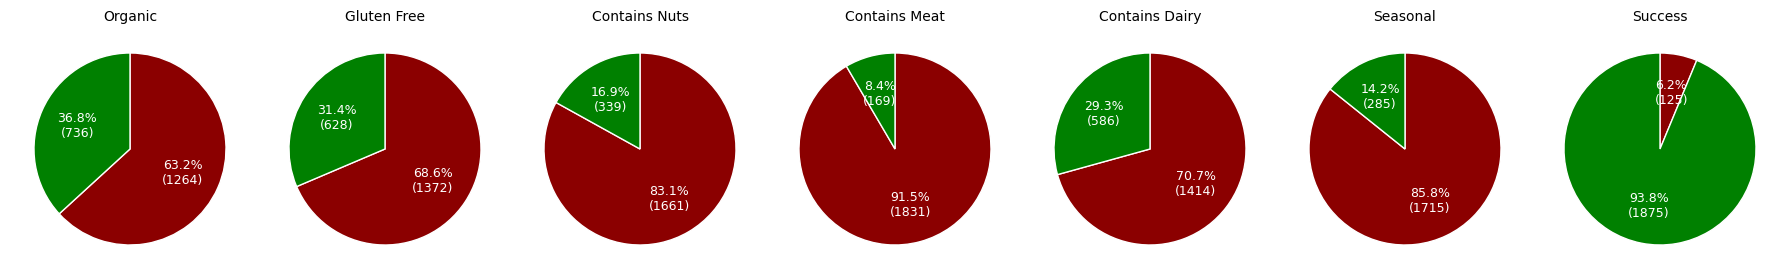

Variable: organic, Null Rows: 0
Variable: gluten_free, Null Rows: 0
Variable: contains_nuts, Null Rows: 0
Variable: contains_meat, Null Rows: 0
Variable: contains_dairy, Null Rows: 0
Variable: seasonal, Null Rows: 0
Variable: success, Null Rows: 0


In [25]:
BINARY_COLS = ['organic', 'gluten_free', 'contains_nuts', 'contains_meat', 'contains_dairy', 'seasonal', 'success']

def safe_autopct(values):
    """Formats pie chart text to show both percentage and count."""
    def inner(pct):
        total = sum(values)
        if pct == 0 or total == 0:
            return "0%\n(0)"
        count = int(round(pct * total / 100))
        return f"{pct:.1f}%\n({count})"
    return inner

# Create a figure with one subplot for each binary column
fig, axes = plt.subplots(1, len(BINARY_COLS), figsize=(18, 5))

for i, col in enumerate(BINARY_COLS):
    ax = axes[i]
    counts = data[col].value_counts().sort_index()
    sizes = counts.reindex([0, 1], fill_value=0)
    wedges, label_texts, autopct_texts = ax.pie(
        sizes,
        autopct=safe_autopct(sizes),
        startangle=90,
        colors=['#8b0000', 'green'],
        counterclock=False,
    )

    for text_list in [label_texts, autopct_texts]:
        for txt in text_list:
            txt.set_color('white')
            txt.set_fontsize(9)

    ax.set_title(col.replace("_", " ").title(), fontsize=10, color='black')

plt.tight_layout()
plt.show()
for col in BINARY_COLS:
    null_count = data[col].isnull().sum()
    print(f"Variable: {col}, Null Rows: {null_count}")


Most of the variables are imbalanced - they have more 0 values than 1. The target binary variable shows a strong imbalance ratio for success and failure so we need to address it because the model which predicts success for every observation will have 93.8 % accuracy but no usefulness. There are no missing values.

## Ordinal variable

Ordinal Variable: spicy_level 
Null Rows: 0
Unique Levels: 6
Distribution:
|   spicy_level |   Count |   Proportion (%) |
|--------------:|--------:|-----------------:|
|             0 |     558 |            27.9  |
|             1 |     505 |            25.25 |
|             2 |     503 |            25.15 |
|             3 |     285 |            14.25 |
|             4 |     118 |             5.9  |
|             5 |      31 |             1.55 |

Mode: 0, Median: 1.0



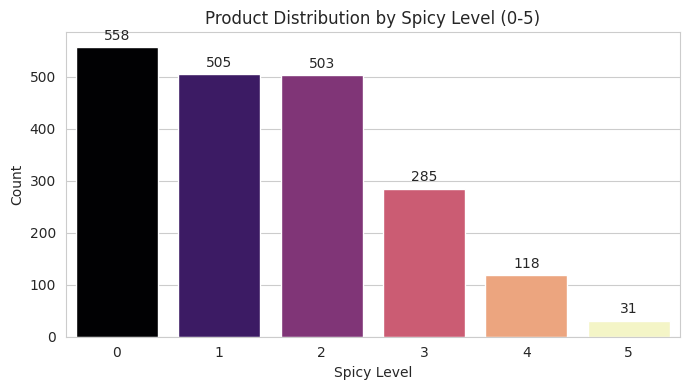

In [26]:
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['figure.dpi'] = 100

print("Ordinal Variable: spicy_level ")
counts = data['spicy_level'].value_counts().sort_index()
proportions = data['spicy_level'].value_counts(normalize=True).sort_index() * 100
summary_df = pd.DataFrame({
    'Count': counts,
    'Proportion (%)': proportions.round(2)
})
null_count = data['spicy_level'].isnull().sum()
print(f"Null Rows: {null_count}")
print(f"Unique Levels: {data['spicy_level'].nunique()}")
print("Distribution:")
print(summary_df.to_markdown())
median_val = data['spicy_level'].median()
mode_val = data['spicy_level'].mode().iloc[0] if not data['spicy_level'].mode().empty else 'N/A'

print(f"\nMode: {mode_val}, Median: {median_val}\n")
plt.figure()
order = sorted(data['spicy_level'].unique())

ax = sns.countplot(
    x='spicy_level',
    data=data,
    order=order,
    hue='spicy_level',
    palette='magma',
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Product Distribution by Spicy Level (0-5)', fontsize=12)
plt.xlabel('Spicy Level', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

Most of the products aren't spicy at all.

## Interval scaled numerical variables

In [27]:
def plot_numeric_descriptive_analysis(data, cols_list, title, hist_color_1, hist_color_2, box_color_1, box_color_2, median_color):
    """
    Generates descriptive statistics and customized 4-plot visualizations for numeric columns.
    """
    print(f"\n--- {title} ---\n")
    # 1. Summary Statistics Table
    print("Descriptive Statistics:")
    desc_df = data[cols_list].describe().T
    summary_df = desc_df.rename(columns={'50%': 'median'})
    summary_df['null count'] = data[cols_list].isnull().sum()
    print(summary_df.to_markdown(floatfmt=".2f"))

    # 2. Histograms and Box Plots
    num_vars = len(cols_list)
    for i in range(0, num_vars, 2):
        col1 = cols_list[i]
        col2 = cols_list[i+1] if i + 1 < num_vars else None
        # Custom width ratios: [3 (Hist), 1 (Box), 3 (Hist), 1 (Box)]
        fig = plt.figure(figsize=(18, 5))
        gs = fig.add_gridspec(1, 4, width_ratios=[3, 1, 3, 1])
        # Variable 1
        ax0 = fig.add_subplot(gs[0, 0])
        sns.histplot(data[col1], kde=True, ax=ax0, color=hist_color_1, bins=15)
        ax0.axvline(data[col1].mean(), color='red', linestyle='--', label=f'Mean: {data[col1].mean():.2f}')
        ax0.axvline(data[col1].median(), color=median_color, linestyle='-', label=f'Median: {data[col1].median():.2f}')
        ax0.set_title(f'{col1.replace("_", " ").title()}', fontsize=10)
        ax0.set_xlabel('')

        print("mean: ", data[col1].mean())
        print("median: ", data[col1].median())

        ax1 = fig.add_subplot(gs[0, 1])
        sns.boxplot(y=data[col1], ax=ax1, color=box_color_1)
        ax1.set_title(f'{col1.replace("_", " ").title()}', fontsize=10)
        ax1.set_ylabel(col1.replace("_", " ").title())
        ax1.set_xlabel('')

        #Variable 2 (if exists)
        if col2:
            ax2 = fig.add_subplot(gs[0, 2])
            sns.histplot(data[col2], kde=True, ax=ax2, color=hist_color_2, bins=15)
            ax2.axvline(data[col2].mean(), color='red', linestyle='--', label=f'Mean: {data[col2].mean():.2f}')
            ax2.axvline(data[col2].median(), color=median_color, linestyle='-', label=f'Median: {data[col2].median():.2f}')
            ax2.set_title(f'{col2.replace("_", " ").title()}', fontsize=10)
            ax2.set_xlabel('')

            ax3 = fig.add_subplot(gs[0, 3])
            sns.boxplot(y=data[col2], ax=ax3, color=box_color_2)
            ax3.set_title(f'{col2.replace("_", " ").title()}', fontsize=10)
            ax3.set_ylabel(col2.replace("_", " ").title())
            ax3.set_xlabel('')
        else:
            fig.delaxes(fig.add_subplot(gs[0, 2]))
            fig.delaxes(fig.add_subplot(gs[0, 3]))

        plt.tight_layout()
        plt.show()



--- Interval-Scaled Numeric Variable Descriptive Analysis (0-10) ---

Descriptive Statistics:
|                      |   count |   mean |   std |   min |   25% |   median |   75% |   max |   null count |
|:---------------------|--------:|-------:|------:|------:|------:|---------:|------:|------:|-------------:|
| color_intensity      | 2000.00 |   4.81 |  2.09 |  0.00 |  3.30 |     4.80 |  6.20 | 10.00 |         0.00 |
| aroma_intensity      | 1930.00 |   5.48 |  1.96 |  0.00 |  4.20 |     5.50 |  6.80 | 10.00 |        70.00 |
| sweetness            | 2000.00 |   4.61 |  2.68 |  0.00 |  2.50 |     4.50 |  6.70 | 10.00 |         0.00 |
| saltiness            | 2000.00 |   3.98 |  2.21 |  0.00 |  2.30 |     3.90 |  5.50 | 10.00 |         0.00 |
| bitterness           | 2000.00 |   2.11 |  1.34 |  0.00 |  1.10 |     2.00 |  3.00 |  7.20 |         0.00 |
| umami                | 1935.00 |   3.94 |  2.20 |  0.00 |  2.30 |     3.80 |  5.40 | 10.00 |        65.00 |
| sourness             | 

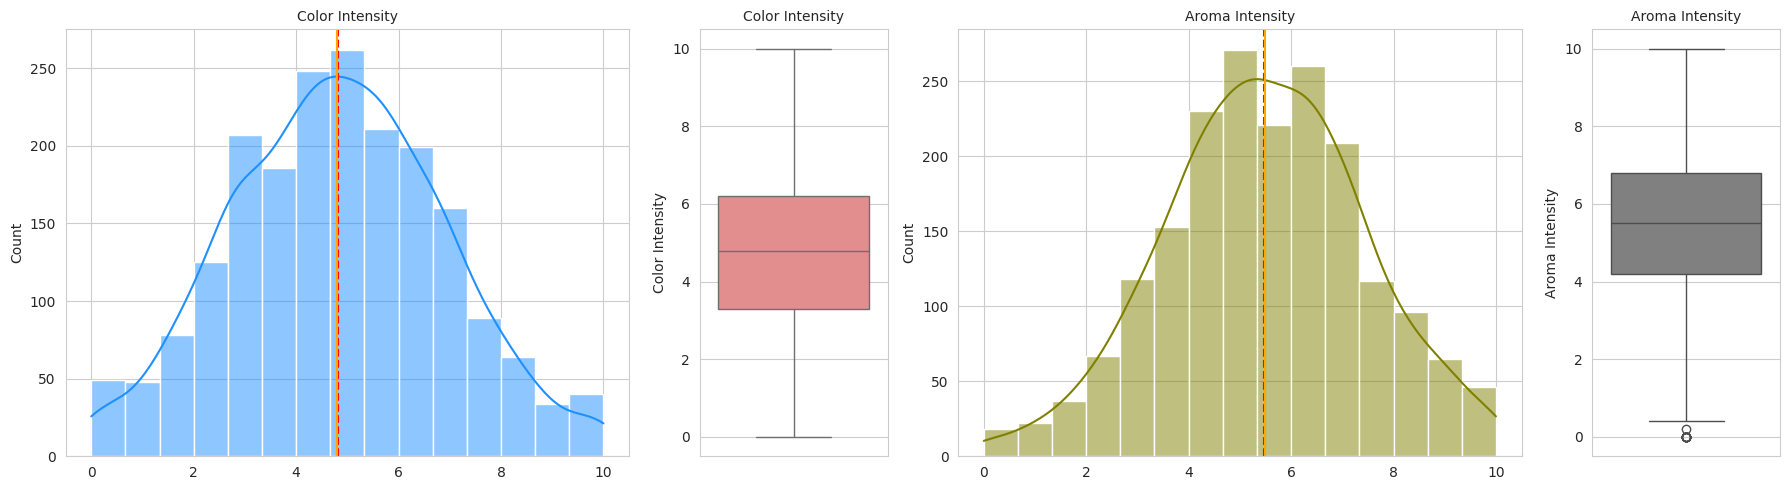

mean:  4.6098
median:  4.5


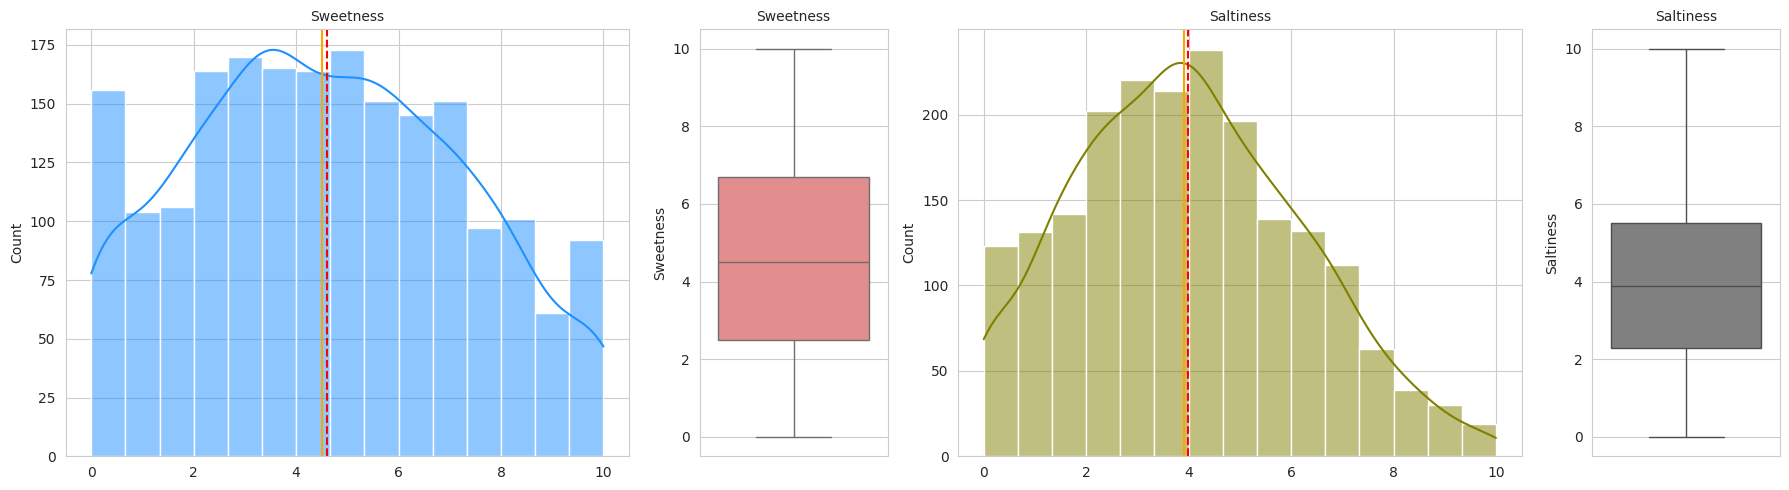

mean:  2.10815
median:  2.0


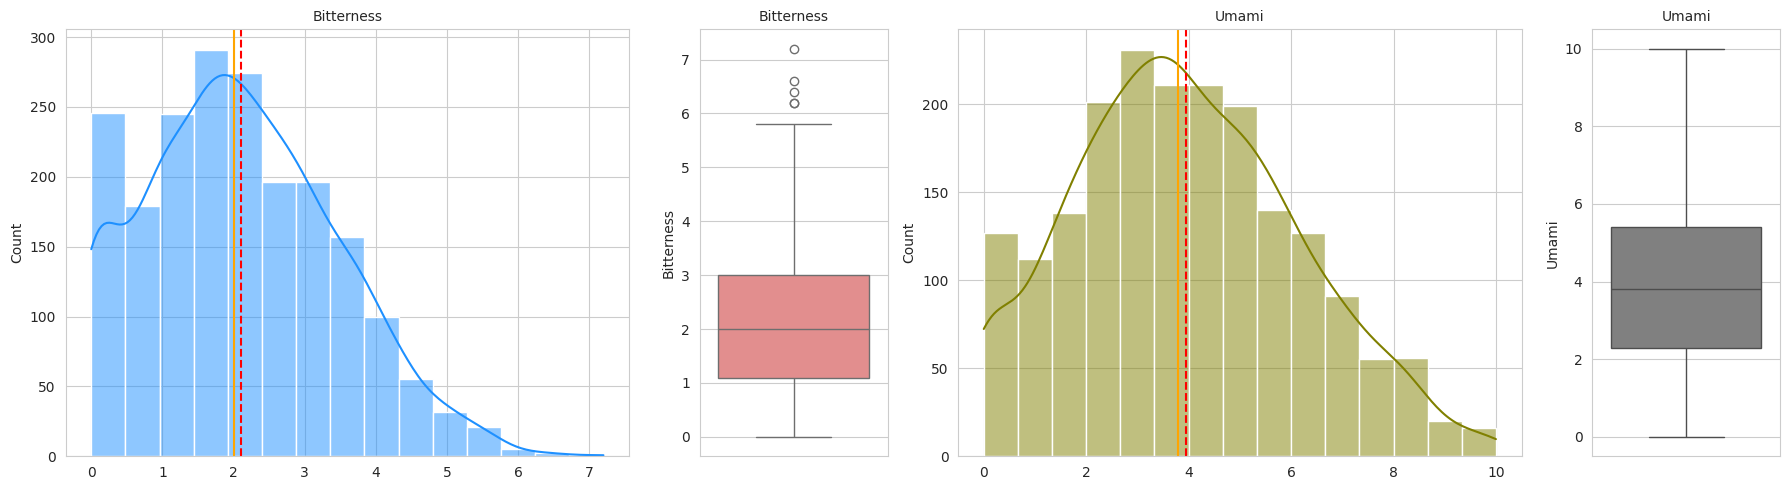

mean:  2.4757000000000002
median:  2.3


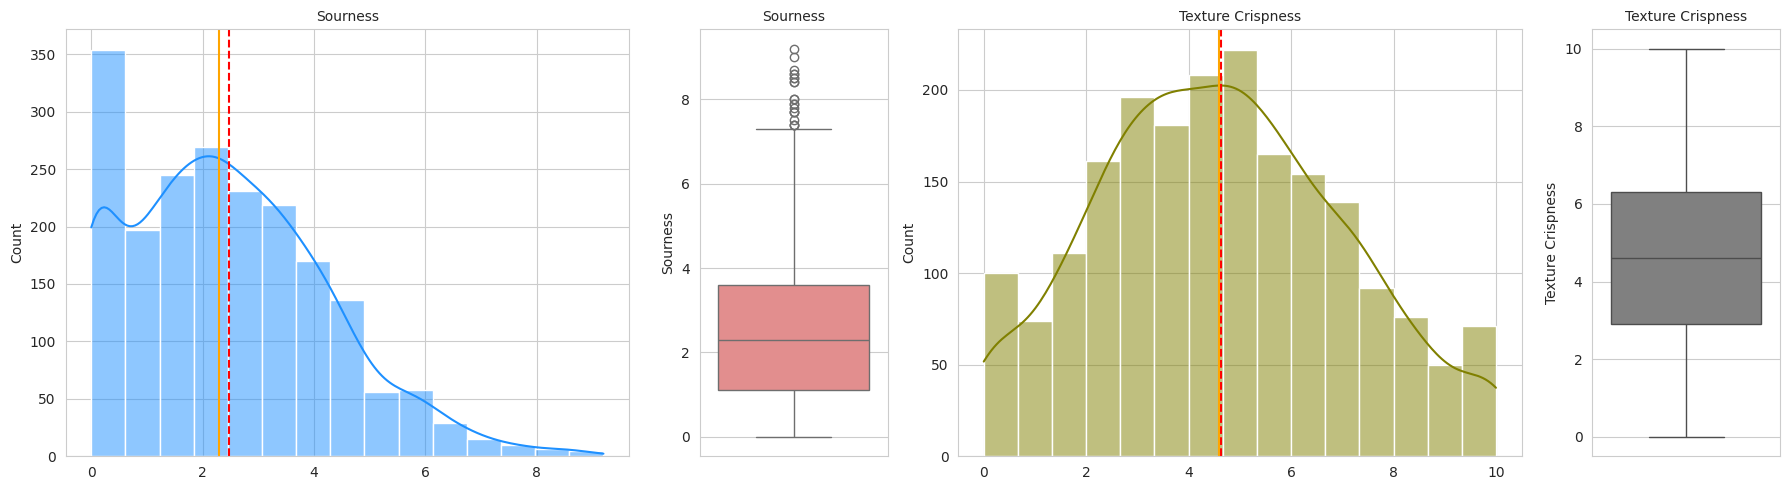

mean:  4.144950000000001
median:  4.1


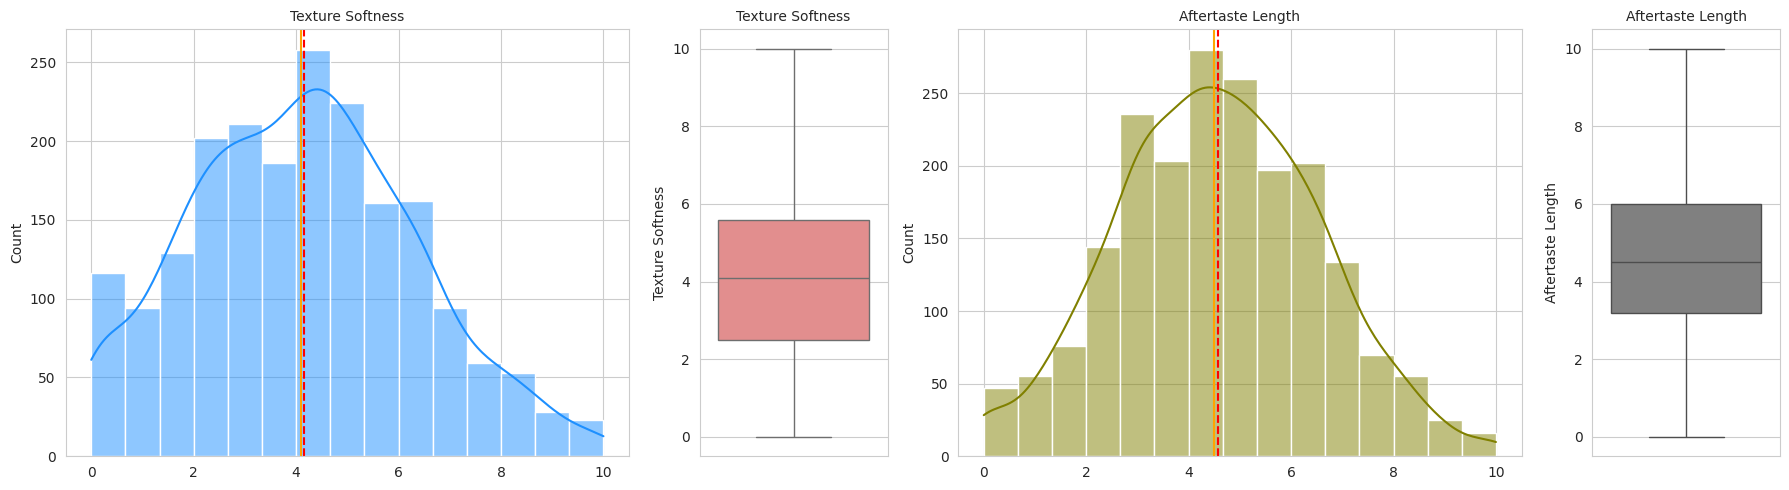

mean:  4.335700000000001
median:  4.3


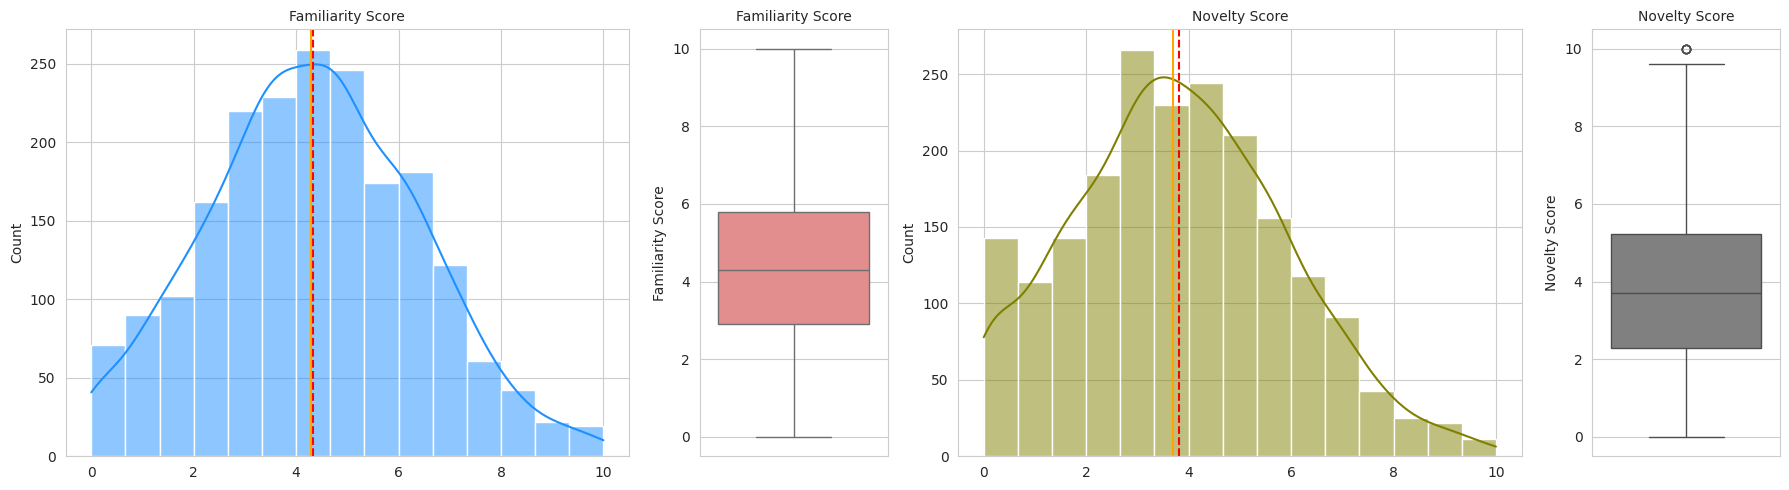

mean:  6.3898
median:  6.4


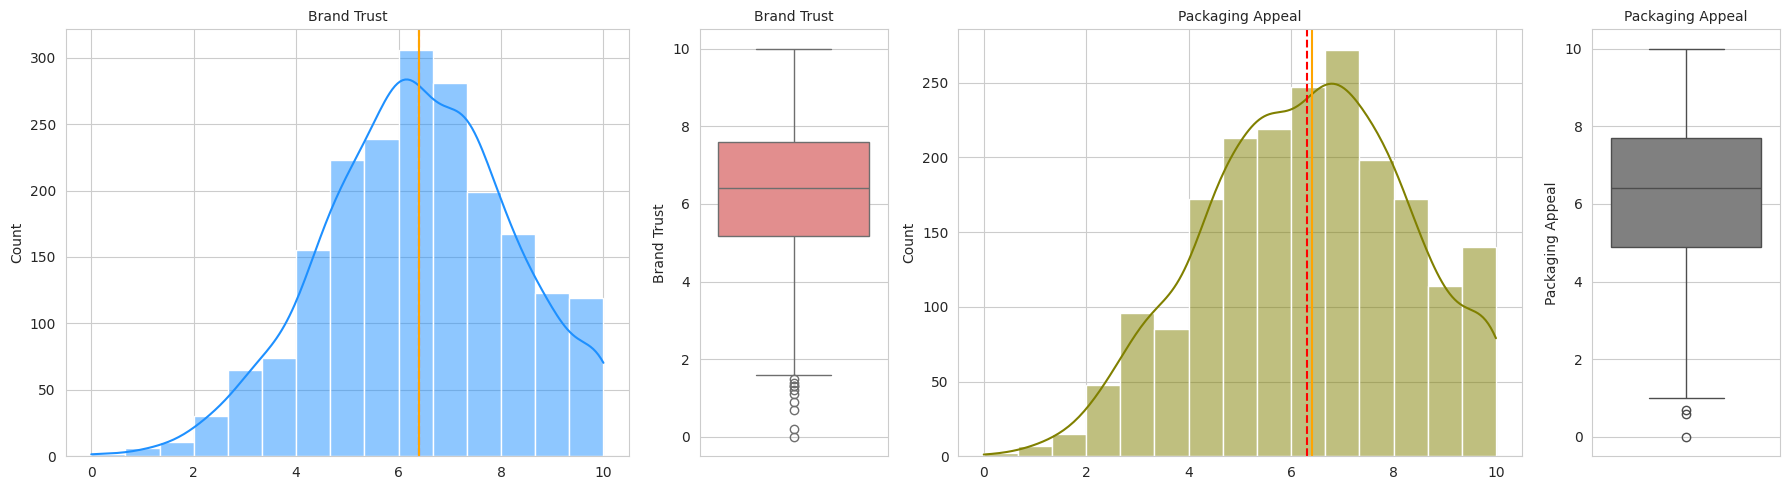

mean:  7.092941953067114
median:  7.320900002749203


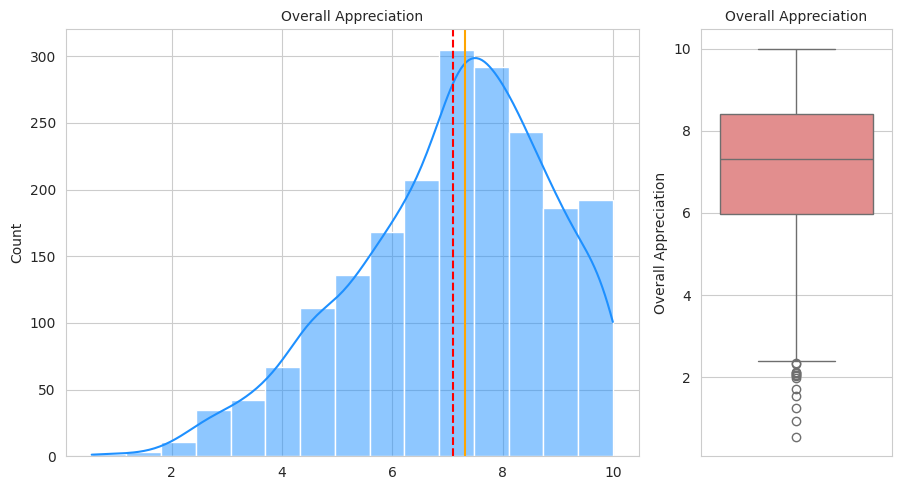

In [28]:
INTERVAL_COLS = ['color_intensity', 'aroma_intensity', 'sweetness', 'saltiness','bitterness', 'umami', 'sourness', 'texture_crispness','texture_softness', 'aftertaste_length', 'familiarity_score','novelty_score', 'brand_trust', 'packaging_appeal', 'overall_appreciation']

plot_numeric_descriptive_analysis(
    data=data,
    cols_list=INTERVAL_COLS,
    title="Interval-Scaled Numeric Variable Descriptive Analysis (0-10)",
    hist_color_1='dodgerblue',
    hist_color_2='olive',
    box_color_1='lightcoral',
    box_color_2='grey',
    median_color='orange'
)

The majority of the interval-scaled variables, such as color_intensity, sweetness, aroma_intensity, and overall_appreciation, exhibit a symmetric distribution. This is evidenced by the mean and median values being closely aligned in the descriptive statistics, suggesting that these variables are not strongly skewed and are close to a normal distribution.

Outliers, however, are present in several variables, as clearly visible in the box plots. Specifically, bitterness, sourness, brand_trust, and packaging_appeal contain extreme values that lie outside the interquartile range (IQR).

The range of all variables is between 0 and 10.

Two columns have missing values: aroma_intensity: 70 and umami: 65. It's not a big problem because the missing values are less than 4% of the number of data so they can be imputed without risking significant changes in the data.

## Ratio-scaled variables


--- Ratio-Scaled Numerical Variable Descriptive Analysis ---

Descriptive Statistics:
|                             |   count |   mean |    std |   min |    25% |   median |    75% |     max |   null count |
|:----------------------------|--------:|-------:|-------:|------:|-------:|---------:|-------:|--------:|-------------:|
| calories                    | 2000.00 | 202.36 |  98.16 |  9.00 | 130.75 |   187.00 | 261.00 |  520.00 |         0.00 |
| fat_g                       | 2000.00 |   6.85 |   3.56 |  0.20 |   3.88 |     6.90 |   9.30 |   16.90 |         0.00 |
| sugar_g                     | 2000.00 |   9.76 |   3.75 |  0.50 |   6.80 |     9.70 |  12.30 |   24.00 |         0.00 |
| protein_g                   | 1929.00 |   9.35 |   5.43 |  0.40 |   5.60 |     7.30 |  13.20 |   25.90 |        71.00 |
| fiber_g                     | 1937.00 |   2.38 |   1.68 |  0.10 |   0.90 |     2.20 |   3.40 |    8.00 |        63.00 |
| sodium_mg                   | 2000.00 | 220.67 | 259.86 |

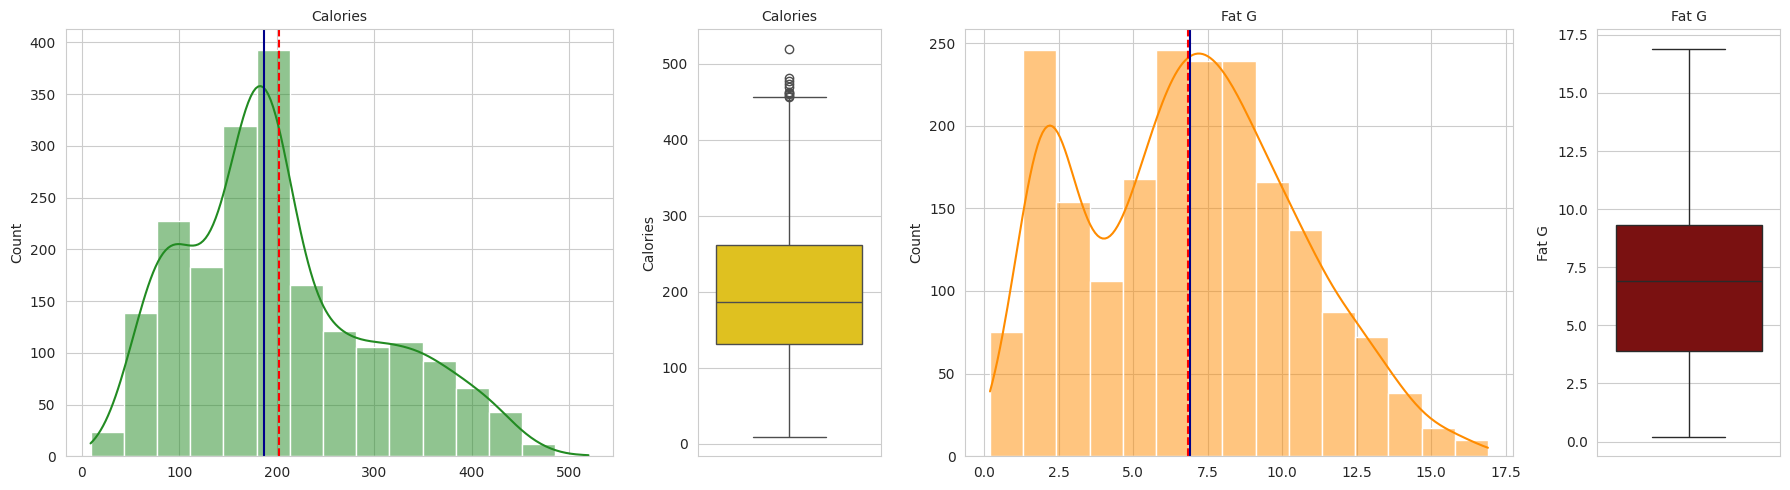

mean:  9.7615
median:  9.7


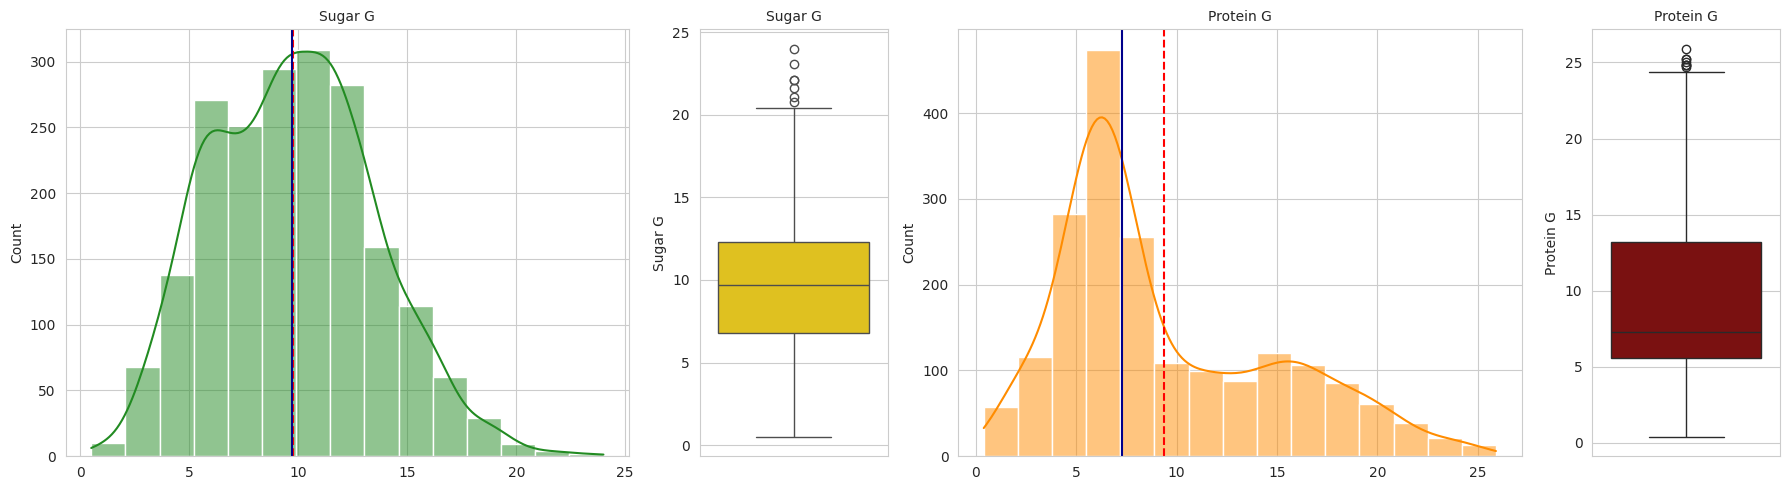

mean:  2.3787816210635007
median:  2.2


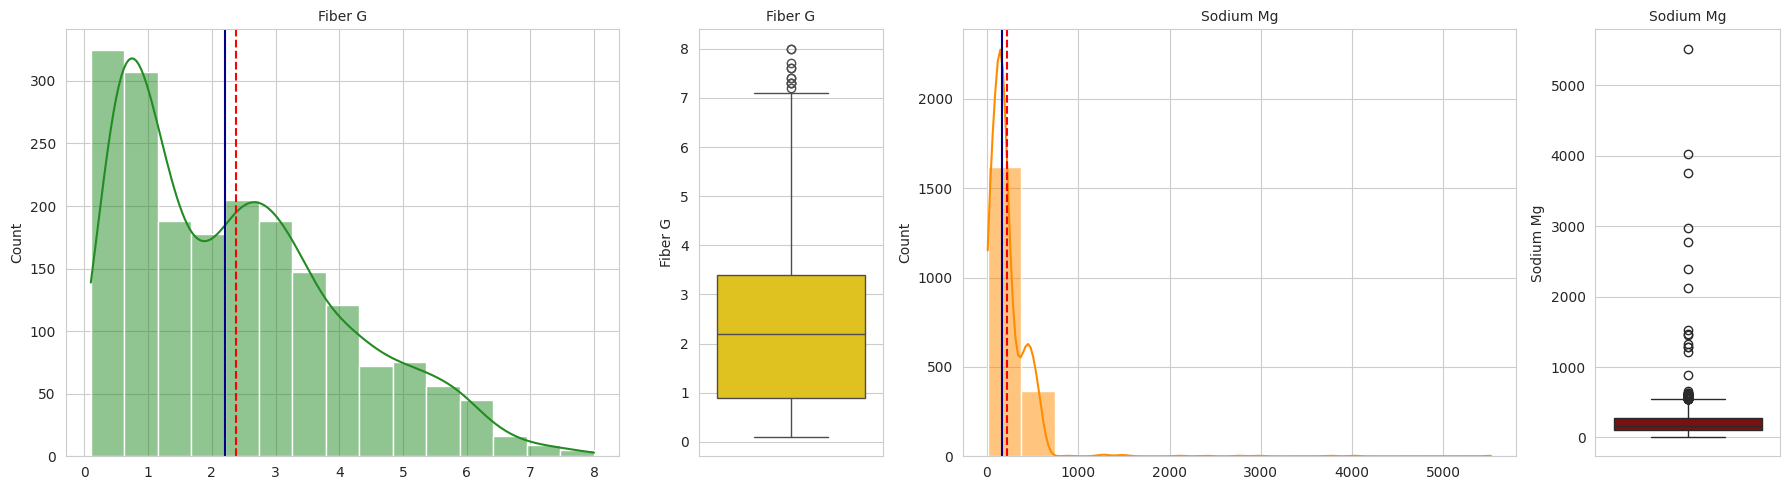

mean:  4.552245
median:  3.89


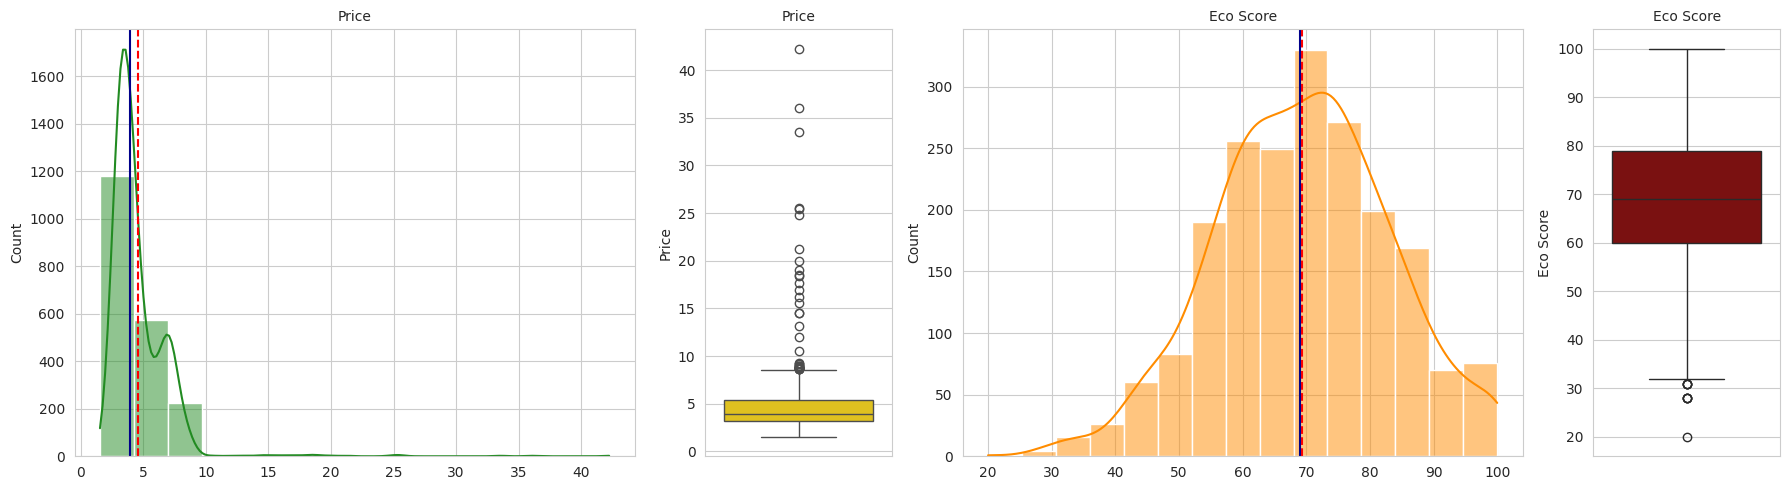

mean:  48.1605
median:  55.0


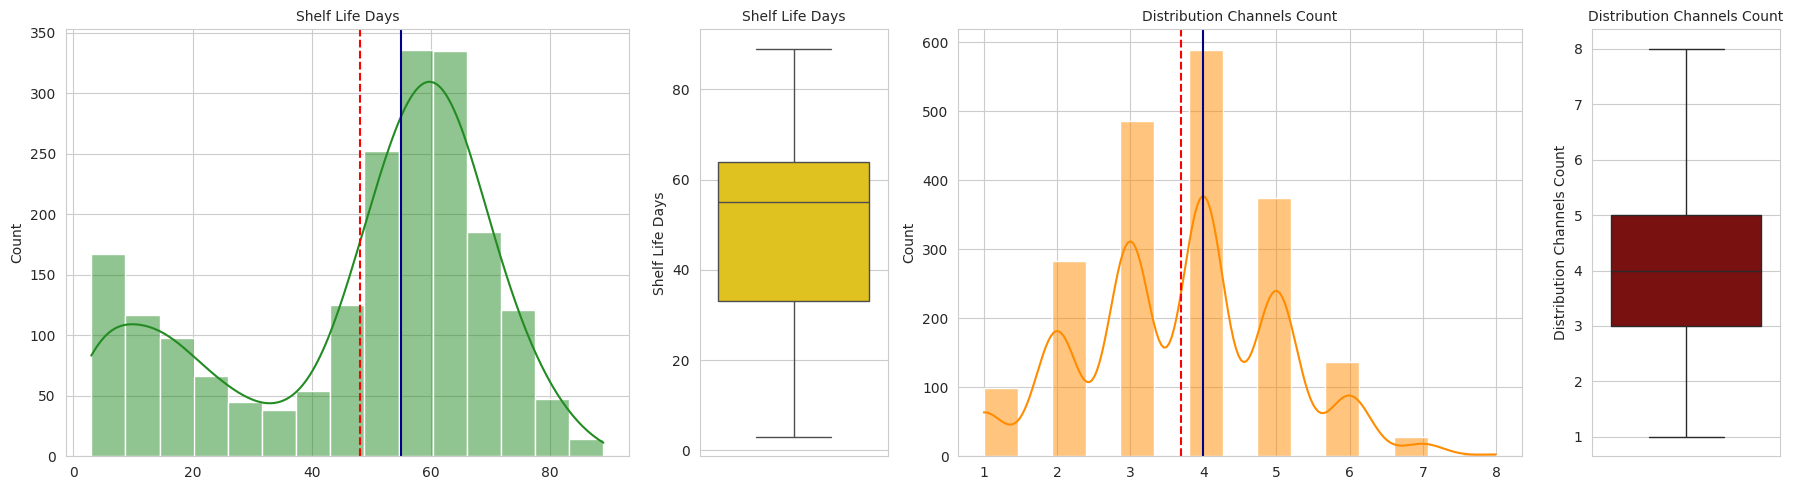

mean:  11.638
median:  8.0


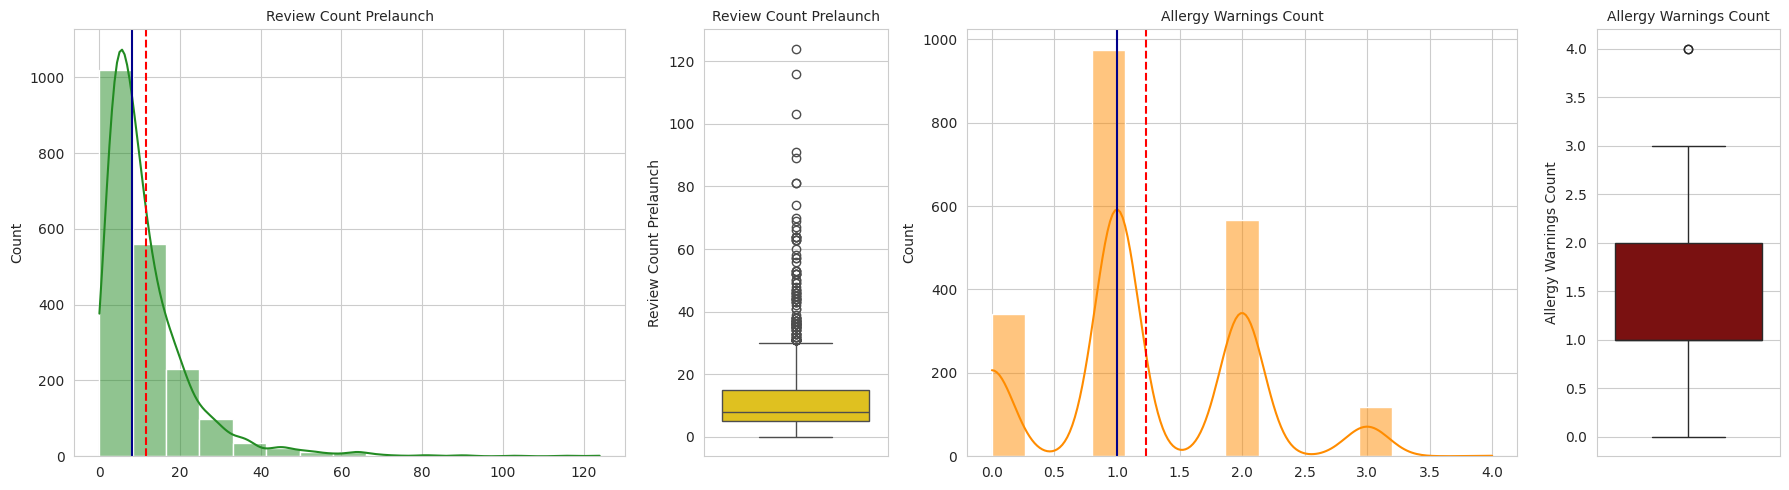

mean:  111.88320000000002
median:  111.6


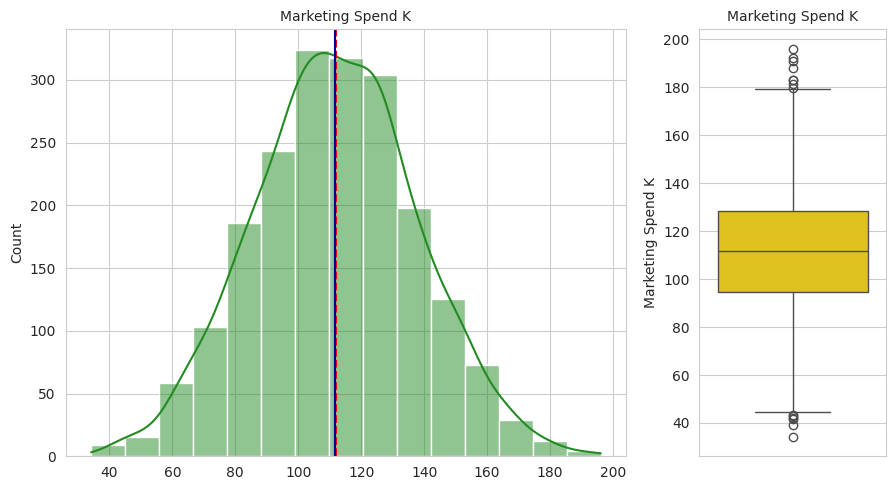

In [29]:
RATIO_COLS = ['calories', 'fat_g', 'sugar_g', 'protein_g', 'fiber_g','sodium_mg', 'price', 'eco_score', 'shelf_life_days','distribution_channels_count', 'review_count_prelaunch','allergy_warnings_count', 'marketing_spend_k']

plot_numeric_descriptive_analysis(
    data=data,
    cols_list=RATIO_COLS,
    title="Ratio-Scaled Numerical Variable Descriptive Analysis",
    hist_color_1='forestgreen',
    hist_color_2='darkorange',
    box_color_1='gold',
    box_color_2='darkred',
    median_color='darkblue',
)

Based on the plots of the ratio-scaled variables, most distributions deviate significantly from normality, often showing strong positive skewness and a high number of outliers in key metrics such as Price, Sodium (mg), and Review count prelaunch. This non-normal behavior indicates that data transformations—such as log or square root—may be necessary before applying linear models. Additionally, the visualizations reveal that Allergy warnings count and Distribution channels count are actually discrete, categorical variables, which should be properly encoded (e.g., via One-Hot Encoding) rather than treated as continuous in predictive models.

The range of the variables spans from 0 to 5520. Similar to the interval-scaled variables, there are two columns with missing values: protein_g (71) and fiber_g (63). Since these missing values represent less than 4% of the observations, imputing them is the most appropriate approach.

What's done:
1. description of the data considering their type: the analysis of proportions, frequencies, distribution, range, missing values.

# Filling missing values

The goal is to apply group-based imputation using categories, as there is a sufficient number of distinct categories and we expect them to meaningfully differ in their nutritional characteristics.

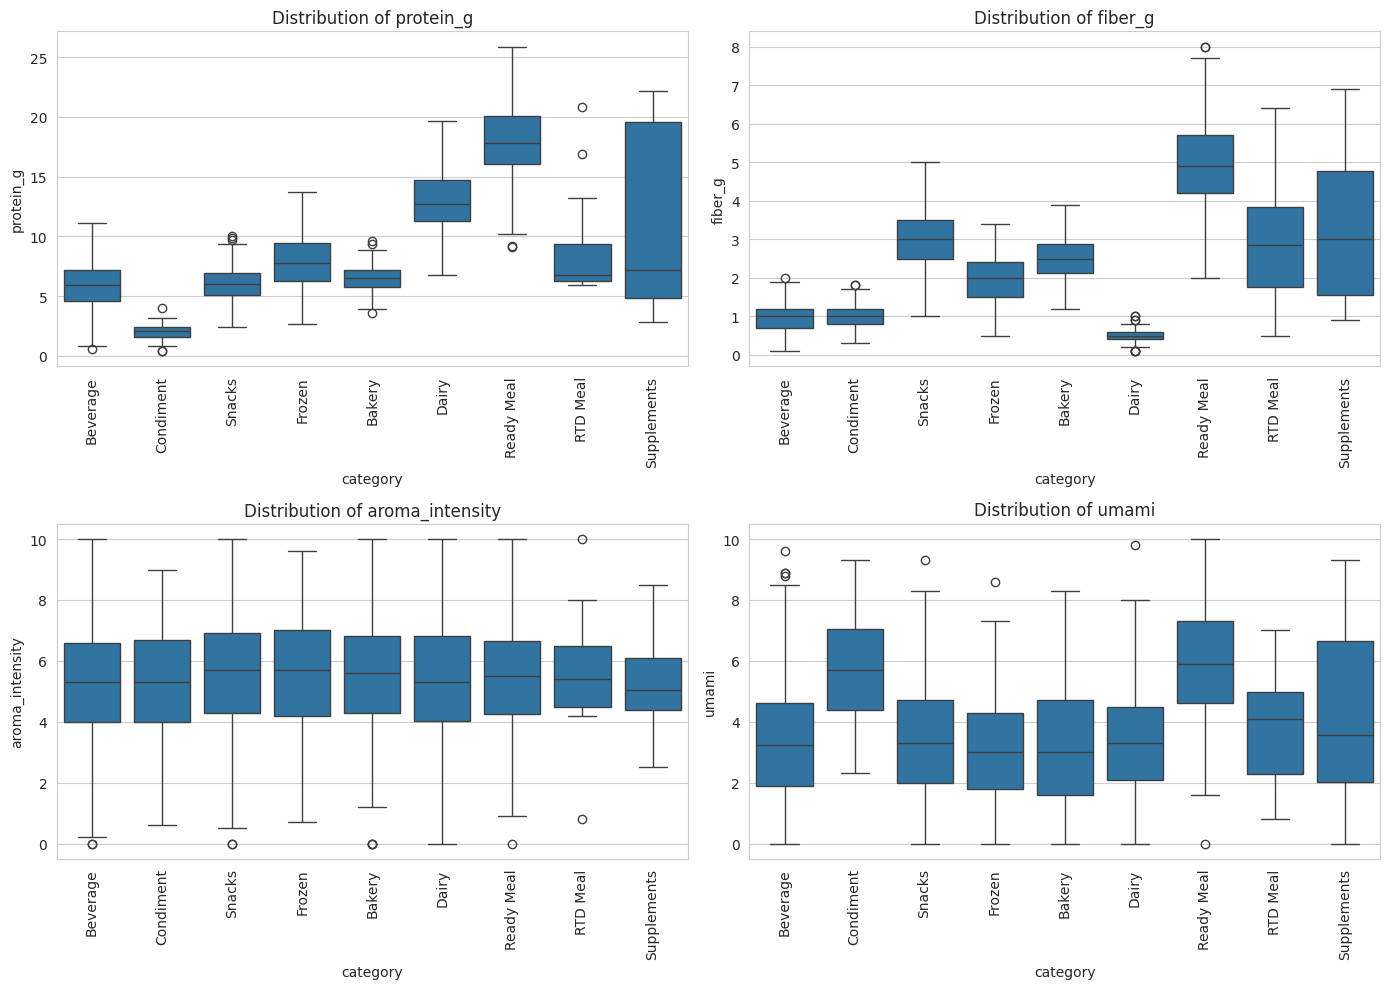

In [30]:
cols = ['protein_g', 'fiber_g', 'aroma_intensity', 'umami']
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, x='category', y=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As expected, there are clear differences in fiber and protein levels across categories, so we will use category-based group medians to impute the missing values in these variables. However, there is no significant difference for aroma_intensity and umami across categories, so we will examine their correlations with other variables to identify suitable candidates for imputation.

In [31]:
target_cols = ['aroma_intensity', 'umami']
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
corr_matrix = data[numeric_cols].corr(method='pearson')
for col in target_cols:
    correlations = corr_matrix[col].drop(col)
    top5 = correlations.abs().sort_values(ascending=False).head(5)
    print(f"\nTop 5 correlations for {col}:")
    print(top5)


Top 5 correlations for aroma_intensity:
overall_appreciation    0.245488
success                 0.078433
fat_g                   0.058768
umami                   0.043116
color_intensity         0.036073
Name: aroma_intensity, dtype: float64

Top 5 correlations for umami:
fiber_g                 0.302919
protein_g               0.284974
calories                0.284933
sugar_g                 0.272459
overall_appreciation    0.269377
Name: umami, dtype: float64


Since there are no strongly correlated variables for aroma_intensity and umami, we will impute their missing values using the global median.

In [32]:
group_impute = ['protein_g', 'fiber_g']
global_impute = ['aroma_intensity', 'umami']
GROUP_COL = 'category'
df = data.copy()

for col in group_impute:
    df[col] = df.groupby(GROUP_COL)[col].transform(
        lambda x: x.fillna(x.median())
    )
    df[col] = df[col].fillna(df[col].median())

for col in global_impute:
    df[col] = df[col].fillna(df[col].median())


print("Missing values after imputation:")
print(df[['protein_g', 'fiber_g', 'aroma_intensity', 'umami']].isnull().sum())

Missing values after imputation:
protein_g          0
fiber_g            0
aroma_intensity    0
umami              0
dtype: int64


# Categorical variables transformations

First, we look at the bar plots for the potential categorical variables to see how the values of each category are distributed.

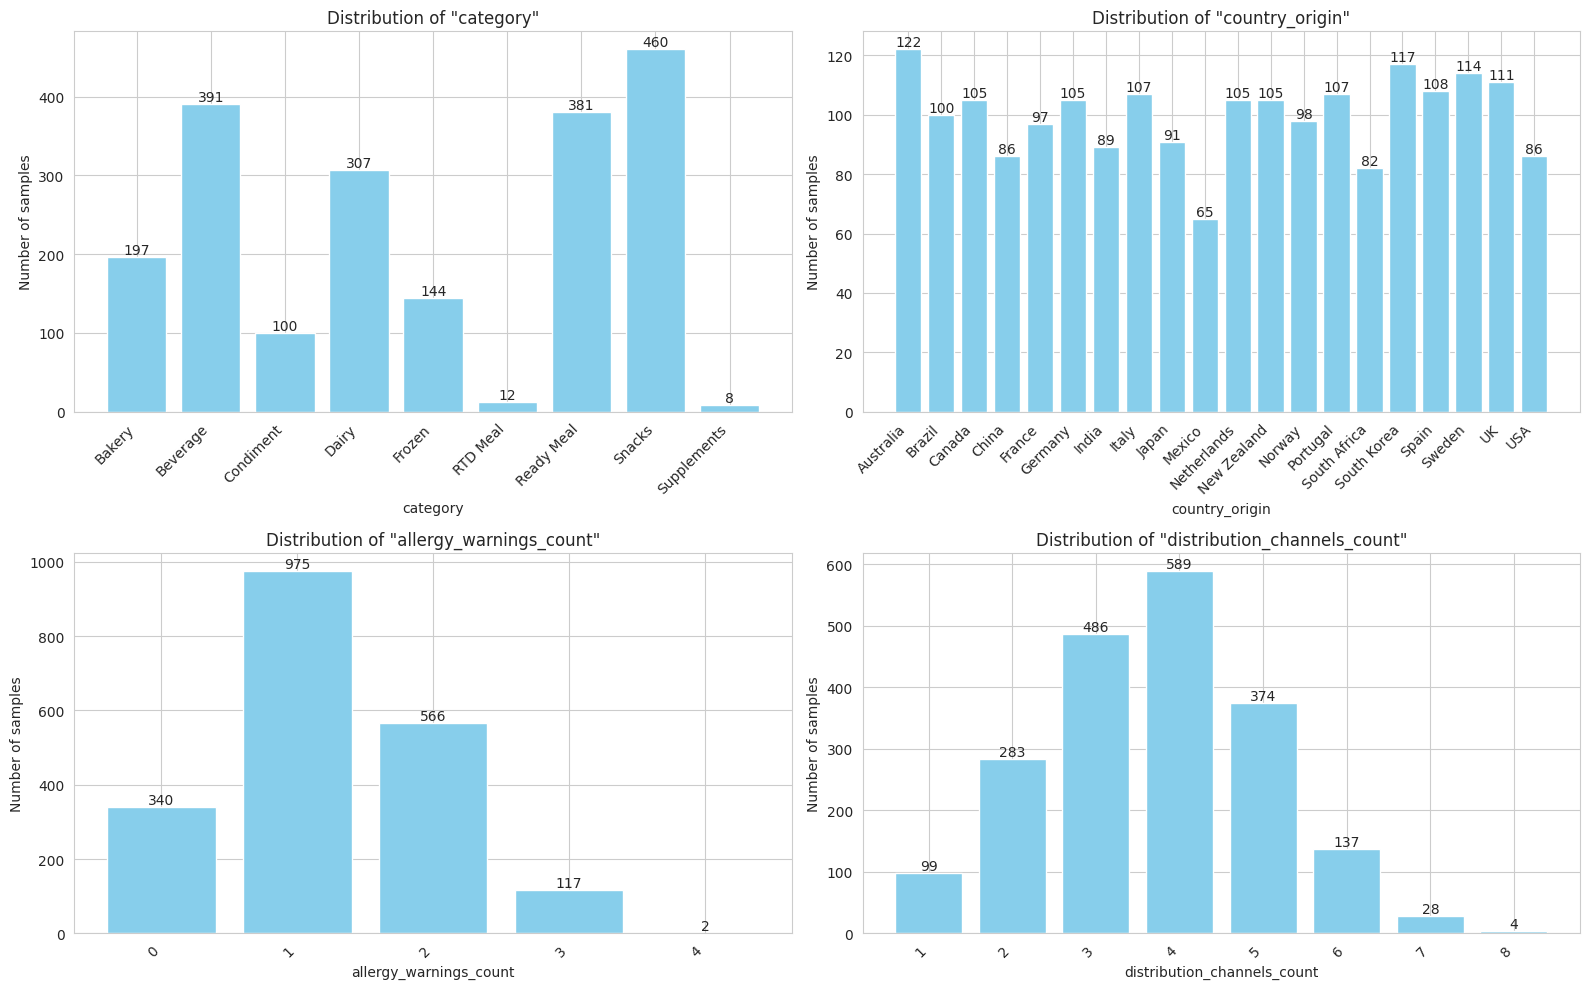

In [33]:
CAT_COLS = ['category', 'country_origin', 'allergy_warnings_count', 'distribution_channels_count']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for ax, col in zip(axes.flatten(), CAT_COLS):
    counts = data[col].value_counts().sort_index()
    bars = ax.bar(counts.index.astype(str), counts.values, color='skyblue')
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')

    ax.set_title(f'Distribution of "{col}"')
    ax.set_xlabel(col)
    ax.set_ylabel('Number of samples')
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
plt.tight_layout()
plt.show()

'category' has a few rare values, while 'country_origin' has a sufficient number of observations per country. 'allergy_warnings_count' and 'distribution_channels_count' also contain some rare categories. Next, we will look at the number of observations and their percentage share for each category.

In [34]:
summary_list = []

for col in CAT_COLS:
    counts = data[col].value_counts().reset_index()
    counts.columns = ['category', 'count']
    counts['variable'] = col
    counts['percent'] = counts['count'] / counts['count'].sum() * 100
    summary_list.append(counts)

summary_df = pd.concat(summary_list, axis=0, ignore_index=True)
summary_df = summary_df[['variable', 'category', 'count', 'percent']]
summary_df = summary_df.sort_values(by=['variable', 'count'], ascending=[True, False]).reset_index(drop=True)

print(summary_df)

                       variable      category  count  percent
0        allergy_warnings_count             1    975    48.75
1        allergy_warnings_count             2    566    28.30
2        allergy_warnings_count             0    340    17.00
3        allergy_warnings_count             3    117     5.85
4        allergy_warnings_count             4      2     0.10
5                      category        Snacks    460    23.00
6                      category      Beverage    391    19.55
7                      category    Ready Meal    381    19.05
8                      category         Dairy    307    15.35
9                      category        Bakery    197     9.85
10                     category        Frozen    144     7.20
11                     category     Condiment    100     5.00
12                     category      RTD Meal     12     0.60
13                     category   Supplements      8     0.40
14               country_origin     Australia    122     6.10
15      

Before converting the variables to dummy variables, we will transform the original categorical variables to handle very rare values that may not be useful for modeling.

- allergy_warnings_count will be grouped into four categories: 0, 1, 2, >2.
- country_origin will remain unchanged.
- category: RTD Meal and Supplements will be combined into a single category called 'Other'.
- distribution_channels_count will be grouped into six categories: 1, 2, 3, 4, 5, >5.

In [35]:
df = data.copy()

# 1. Transform allergy_warnings_count into 0,1,2,>2
def transform_allergy(x):
    if x > 2:
        return '>2'
    else:
        return str(int(x))

df['allergy_warnings_count'] = df['allergy_warnings_count'].fillna(0).apply(transform_allergy)

# 2. Transform distribution_channels_count into 1,2,3,4,5,>5
def transform_distribution(x):
    if x > 5:
        return '>5'
    else:
        return str(int(x))

df['distribution_channels_count'] = df['distribution_channels_count'].fillna(0).apply(transform_distribution)

# 3. Remove rare categories ('RTD Meal' & 'Supplements') by treating them as a single category 'Other'.
rare_categories = ['RTD Meal', 'Supplements']
df['category'] = df['category'].replace(rare_categories, 'other')

# 4. Create dummy variables for categories, country_origin, allergy_warnings_count, distribution_channels_count
CAT_COLS = ['category', 'country_origin', 'allergy_warnings_count', 'distribution_channels_count']
df_dummies = pd.get_dummies(df, columns=CAT_COLS, drop_first=True)

print("List of new columns after dummy encoding:")
print(df_dummies.columns)


List of new columns after dummy encoding:
Index(['product_id', 'name', 'subcategory', 'description', 'calories', 'fat_g',
       'sugar_g', 'protein_g', 'fiber_g', 'sodium_mg', 'organic',
       'gluten_free', 'contains_nuts', 'contains_meat', 'contains_dairy',
       'seasonal', 'spicy_level', 'color_intensity', 'aroma_intensity',
       'sweetness', 'saltiness', 'bitterness', 'umami', 'sourness',
       'texture_crispness', 'texture_softness', 'aftertaste_length', 'price',
       'familiarity_score', 'novelty_score', 'brand_trust', 'packaging_appeal',
       'eco_score', 'shelf_life_days', 'review_count_prelaunch',
       'marketing_spend_k', 'overall_appreciation', 'success',
       'category_Beverage', 'category_Condiment', 'category_Dairy',
       'category_Frozen', 'category_Ready Meal', 'category_Snacks',
       'category_other', 'country_origin_Brazil', 'country_origin_Canada',
       'country_origin_China', 'country_origin_France',
       'country_origin_Germany', 'country_ori

# Handling nearly constant variables
Because features with extremely low variance add noise and do not help any model — especially a classifier like success.

In [36]:
# Separate numeric columns
from sklearn.feature_selection import VarianceThreshold

binary_cols = [col for col in df_dummies.columns if df_dummies[col].nunique() == 2]
continuous_cols = [col for col in df_dummies.select_dtypes(include=np.number).columns if col not in binary_cols]

# Variance threshold for binary columns
binary_selector = VarianceThreshold(threshold=0.01*(1-0.01))
binary_selector.fit(df_dummies[binary_cols])
binary_removed = df_dummies[binary_cols].columns[~binary_selector.get_support()]

continuous_selector = VarianceThreshold(threshold=0.1)
continuous_selector.fit(df_dummies[continuous_cols])
continuous_removed = df_dummies[continuous_cols].columns[~continuous_selector.get_support()]

print("Nearly constant binary columns:")
print(binary_removed)
print("\nNearly constant continuous columns:")
print(continuous_removed)


Nearly constant binary columns:
Index(['category_other'], dtype='object')

Nearly constant continuous columns:
Index([], dtype='object')


After creating dummy variables, we checked their variance to ensure they are informative.
We also adjusted the coding of rare categories, and removed any nearly constant variables
that would not contribute meaningfully to the model.


# Bivariate analysis

In [37]:
# Remove the first 5 columns which are non-numericcolumns
cols_to_remove = df_dummies.columns[:5]
df_dummies = df_dummies.drop(columns=cols_to_remove)

print("Columns after removal:")
print(df_dummies.columns)


Columns after removal:
Index(['fat_g', 'sugar_g', 'protein_g', 'fiber_g', 'sodium_mg', 'organic',
       'gluten_free', 'contains_nuts', 'contains_meat', 'contains_dairy',
       'seasonal', 'spicy_level', 'color_intensity', 'aroma_intensity',
       'sweetness', 'saltiness', 'bitterness', 'umami', 'sourness',
       'texture_crispness', 'texture_softness', 'aftertaste_length', 'price',
       'familiarity_score', 'novelty_score', 'brand_trust', 'packaging_appeal',
       'eco_score', 'shelf_life_days', 'review_count_prelaunch',
       'marketing_spend_k', 'overall_appreciation', 'success',
       'category_Beverage', 'category_Condiment', 'category_Dairy',
       'category_Frozen', 'category_Ready Meal', 'category_Snacks',
       'category_other', 'country_origin_Brazil', 'country_origin_Canada',
       'country_origin_China', 'country_origin_France',
       'country_origin_Germany', 'country_origin_India',
       'country_origin_Italy', 'country_origin_Japan', 'country_origin_Mexico'

In [38]:
corr_with_target_s = df_dummies.corr()['success'].sort_values(ascending=False).drop(['success','overall_appreciation'])
corr_with_target_s


sugar_g                 0.102138
aroma_intensity         0.078433
category_Snacks         0.067490
sweetness               0.057735
texture_crispness       0.054952
                          ...   
country_origin_China   -0.057277
fiber_g                -0.069267
sodium_mg              -0.079921
protein_g              -0.118078
category_Ready Meal    -0.132487
Name: success, Length: 65, dtype: float64

In [39]:
corr_with_target_a = df_dummies.corr()['overall_appreciation'].sort_values(ascending=False).drop(['overall_appreciation','success'])
corr_with_target_a

sugar_g                0.393671
sweetness              0.353900
aroma_intensity        0.245488
familiarity_score      0.242011
category_Snacks        0.235818
                         ...   
price                 -0.417220
sodium_mg             -0.423338
protein_g             -0.466634
fiber_g               -0.492515
category_Ready Meal   -0.649501
Name: overall_appreciation, Length: 65, dtype: float64

In [40]:
important_vars = corr_with_target_a[abs(corr_with_target_a) > 0.2].index

df_dummies[important_vars].corr()

,sugar_g,sweetness,aroma_intensity,familiarity_score,category_Snacks,texture_crispness,category_Beverage,category_Dairy,shelf_life_days,umami,saltiness,fat_g,price,sodium_mg,protein_g,fiber_g,category_Ready Meal
sugar_g,1.000000,0.261348,0.029167,0.058458,0.121403,0.214414,0.063270,0.076804,-0.292221,-0.272459,-0.283633,-0.193571,-0.290318,-0.260572,-0.439015,-0.357001,-0.560401
sweetness,0.261348,1.000000,0.029488,0.018647,0.358969,0.327785,-0.298440,0.243872,-0.352344,-0.194625,-0.265928,0.065515,-0.204497,-0.065830,-0.168127,-0.088194,-0.318781
aroma_intensity,0.029167,0.029488,1.000000,0.007536,0.045558,0.022137,-0.030551,-0.022381,0.014203,-0.043116,0.006730,0.058768,0.009868,0.000815,-0.008386,0.031830,-0.004810
familiarity_score,0.058458,0.018647,0.007536,1.000000,-0.071843,-0.004516,0.002421,0.028949,-0.097718,-0.016008,-0.026493,-0.005460,-0.033329,0.023608,-0.014009,-0.048390,-0.037590
category_Snacks,0.121403,0.358969,0.045558,-0.071843,1.000000,0.480160,-0.269419,-0.232734,0.263929,-0.155749,-0.226408,0.096410,-0.272417,-0.102502,-0.337386,0.201114,-0.265129
texture_crispness,0.214414,0.327785,0.022137,-0.004516,0.480160,1.000000,-0.219716,-0.176524,-0.063639,-0.128278,-0.162915,0.157195,-0.131216,-0.007605,-0.260058,0.130206,-0.212409
category_Beverage,0.063270,-0.298440,-0.030551,0.002421,-0.269419,-0.219716,1.000000,-0.209919,0.255066,-0.127728,-0.209101,-0.670287,-0.201209,-0.349461,-0.310593,-0.407842,-0.239138
category_Dairy,0.076804,0.243872,-0.022381,0.028949,-0.232734,-0.176524,-0.209919,1.000000,-0.656979,-0.105125,-0.173470,-0.221371,-0.118033,-0.156685,0.274805,-0.472038,-0.206576
shelf_life_days,-0.292221,-0.352344,0.014203,-0.097718,0.263929,-0.063639,0.255066,-0.656979,1.000000,0.147843,0.235659,0.034008,0.113613,0.073105,-0.062743,0.361268,0.283454
umami,-0.272459,-0.194625,-0.043116,-0.016008,-0.155749,-0.128278,-0.127728,-0.105125,0.147843,1.000000,0.229723,0.246610,0.266123,0.253869,0.284974,0.302919,0.430906


In [41]:
corr_matrix = df_dummies.corr()

corr_pairs = (
    corr_matrix.where(~corr_matrix.isna())
    .abs()
    .unstack()
    .reset_index()
)

corr_pairs.columns = ['var1', 'var2', 'corr']

corr_pairs = corr_pairs[corr_pairs['var1'] != corr_pairs['var2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['corr'])

top_corr = corr_pairs.sort_values(by='corr', ascending=False)

top_corr.head(30)


,var1,var2,corr
171,protein_g,category_Ready Meal,0.772971
238,fiber_g,category_Ready Meal,0.744478
3,fat_g,fiber_g,0.695243
33,fat_g,category_Beverage,0.670287
1911,shelf_life_days,category_Dairy,0.656979
2114,overall_appreciation,category_Ready Meal,0.649501
4013,allergy_warnings_count_1,allergy_warnings_count_2,0.612737
37,fat_g,category_Ready Meal,0.569663
1511,price,category_Ready Meal,0.568433
104,sugar_g,category_Ready Meal,0.560401


In [42]:

targets = ["overall_appreciation", "success"]

corr_matrix =df_dummies.corr(method="pearson")

for target in targets:
    print(f"\n=== Correlation with {target} ===")
    corr_target = (
        corr_matrix[target]
        .drop(['success','overall_appreciation'])
        .sort_values(ascending=False)
    )
    print(corr_target.to_markdown(floatfmt=".3f"))


=== Correlation with overall_appreciation ===
|                                |   overall_appreciation |
|:-------------------------------|-----------------------:|
| sugar_g                        |                  0.394 |
| sweetness                      |                  0.354 |
| aroma_intensity                |                  0.245 |
| familiarity_score              |                  0.242 |
| category_Snacks                |                  0.236 |
| texture_crispness              |                  0.234 |
| category_Beverage              |                  0.225 |
| category_Dairy                 |                  0.213 |
| brand_trust                    |                  0.199 |
| packaging_appeal               |                  0.195 |
| texture_softness               |                  0.160 |
| organic                        |                  0.117 |
| distribution_channels_count_5  |                  0.101 |
| marketing_spend_k              |                  0

In [43]:
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

strong_corr = corr_pairs[abs(corr_pairs['Correlation']) >= 0.5] \
                    .sort_values(by='Correlation', ascending=False)

print("\n=== Strong correlations between features (|r| ≥ 0.5) ===")
print(strong_corr.to_markdown(floatfmt=".3f"))



=== Strong correlations between features (|r| ≥ 0.5) ===
|      | Feature1                 | Feature2                 |   Correlation |
|-----:|:-------------------------|:-------------------------|--------------:|
|  165 | protein_g                | category_Ready Meal      |         0.773 |
|  228 | fiber_g                  | category_Ready Meal      |         0.744 |
|    2 | fat_g                    | fiber_g                  |         0.695 |
|   36 | fat_g                    | category_Ready Meal      |         0.570 |
| 1235 | price                    | category_Ready Meal      |         0.568 |
|  290 | sodium_mg                | category_Ready Meal      |         0.526 |
| 1313 | novelty_score            | marketing_spend_k        |         0.506 |
|  101 | sugar_g                  | category_Ready Meal      |        -0.560 |
| 2183 | allergy_warnings_count_1 | allergy_warnings_count_2 |        -0.613 |
| 1586 | overall_appreciation     | category_Ready Meal      |        -0.


=== Variables with |correlation| ≥ 0.20 to overall_appreciation ===
['overall_appreciation', 'category_Ready Meal', 'fiber_g', 'protein_g', 'sodium_mg', 'price', 'fat_g', 'saltiness', 'sugar_g', 'sweetness', 'umami', 'aroma_intensity', 'shelf_life_days', 'familiarity_score', 'category_Snacks', 'texture_crispness', 'category_Beverage', 'category_Dairy']


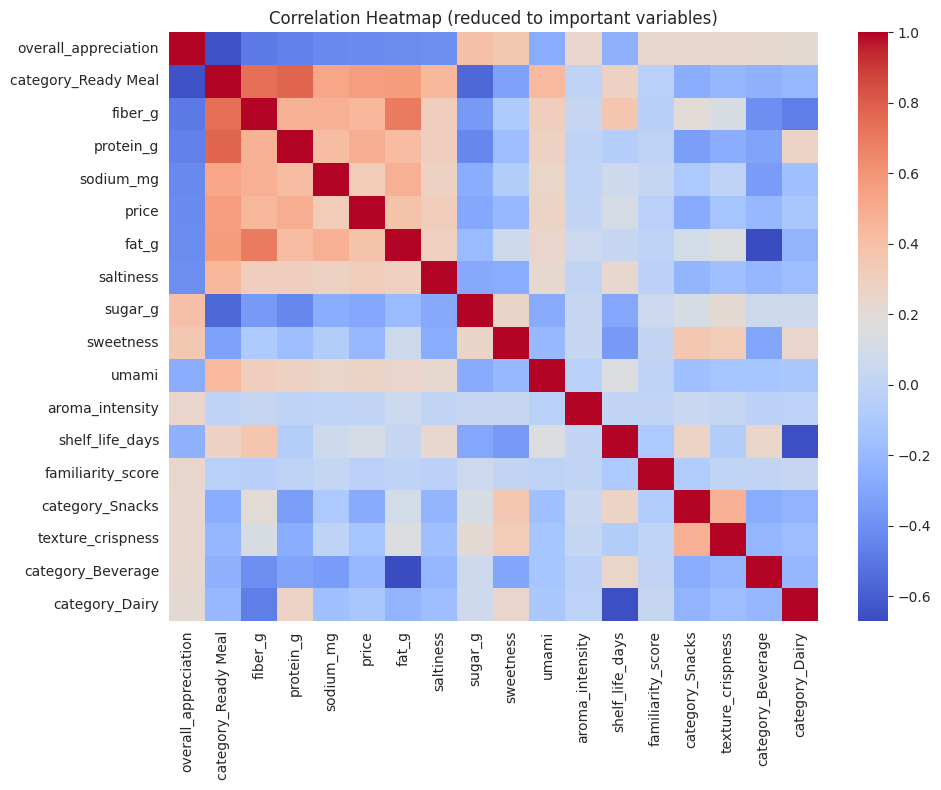

In [44]:
important_vars = (
    corr_matrix["overall_appreciation"]
    .abs()
    .sort_values(ascending=False)
)
important_vars = important_vars[important_vars >= 0.20].index.tolist()

print("\n=== Variables with |correlation| ≥ 0.20 to overall_appreciation ===")
print(important_vars)

corr_subset = corr_matrix.loc[important_vars, important_vars]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (reduced to important variables)")
plt.tight_layout()
plt.show()

Now we focus on visualizing the relationships between the variables with scatterplots.

['overall_appreciation', 'category_Ready Meal', 'fiber_g', 'protein_g', 'sodium_mg', 'price', 'fat_g', 'saltiness', 'sugar_g', 'sweetness', 'umami', 'aroma_intensity', 'shelf_life_days', 'familiarity_score', 'category_Snacks', 'texture_crispness', 'category_Beverage', 'category_Dairy']


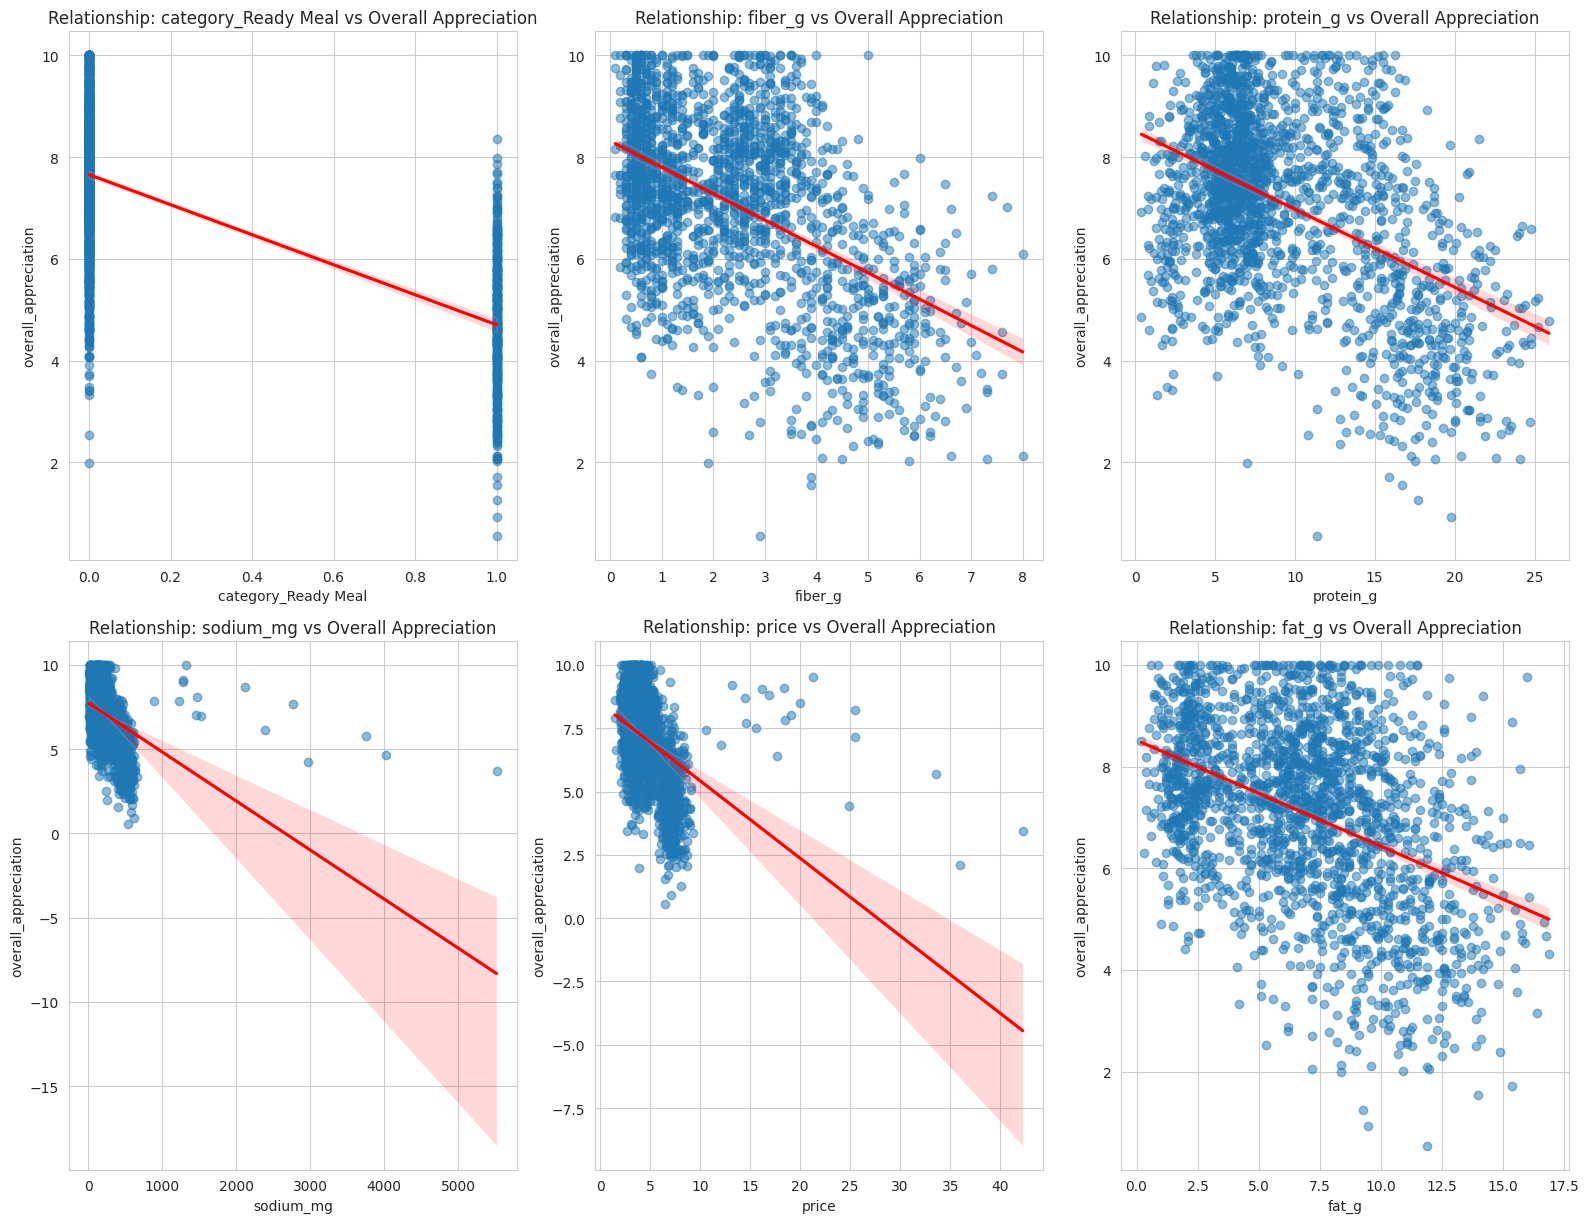

In [45]:
# top 6 correlated variables
print(important_vars)
top_vars = important_vars[1:7] 

fig, axes = plt.subplots(3, 3, figsize=(16, 18)) 
axes = axes.flatten() 

for i, var in enumerate(top_vars):
    sns.regplot(x=var, y='overall_appreciation', data=df_dummies,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f"Relationship: {var} vs Overall Appreciation")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




### Now we test numerical vs categorical
We divide overal_appreciation into 3 bins with equal width:

Pandas splits the data so that:

1/3 of the observations go into the first bin

1/3 into the second bin

1/3 into the third bin

The division is based on the percentiles of the data.

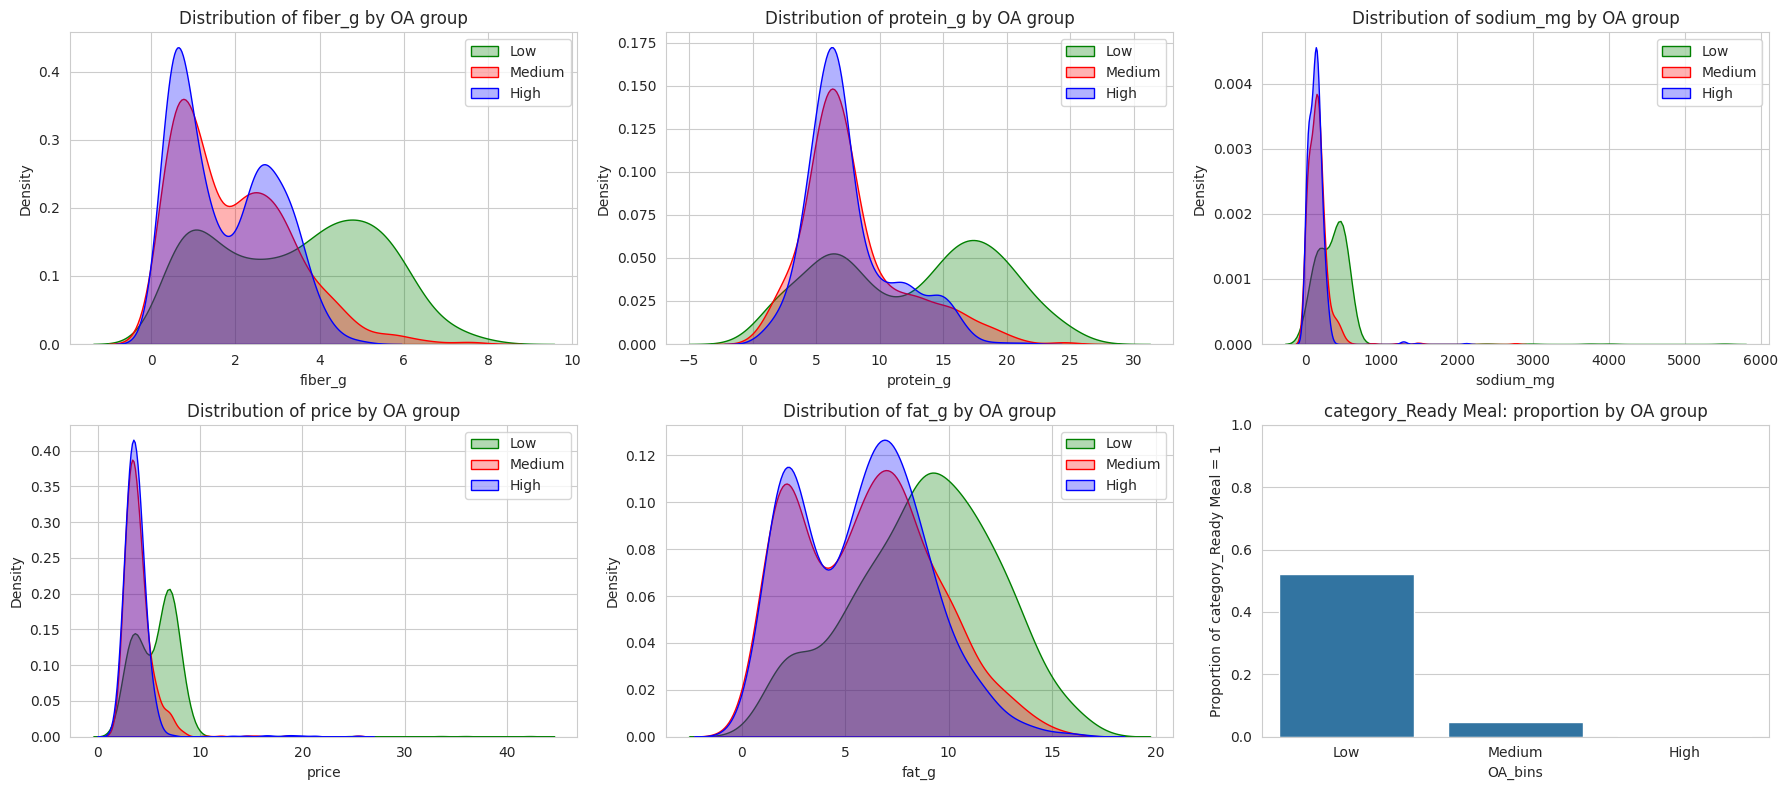

In [50]:
colors = ['green', 'red', 'blue']
features_to_plot = important_vars[2:7]
num_features = len(features_to_plot)
ncols = 3 # Number of subplots per row
# Calculate number of rows needed, accounting for the additional binary feature plot
nrows = ((num_features + 1) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

df['OA_bins'] = pd.qcut(df['overall_appreciation'], q=3, labels=['Low', 'Medium', 'High'])
df_dummies['OA_bins'] = df['OA_bins']


for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    for j, group in enumerate(['Low', 'Medium', 'High']):
        sns.kdeplot(df[df['OA_bins'] == group][feature], label=group, fill=True, alpha=0.3, color=colors[j], ax=ax)
        ax.set_title(f'Distribution of {feature} by OA group')
        ax.legend()

binary_feature = important_vars[1]

# Compute the mean (proportion) of 1's per OA bin
bin_values = df_dummies.groupby('OA_bins', observed=True)[binary_feature].mean()

# Add the binary feature plot to the next available subplot slot
ax_binary = axes[num_features]
sns.barplot(x=bin_values.index, y=bin_values.values, ax=ax_binary)
ax_binary.set_ylabel(f"Proportion of {binary_feature} = 1")
ax_binary.set_title(f"{binary_feature}: proportion by OA group")
ax_binary.set_ylim(0, 1)


# Hide any unused subplots, starting from the slot after the binary feature plot
for k in range(num_features + 1, nrows * ncols):
    fig.delaxes(axes[k])


plt.tight_layout()
plt.show()